# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print.

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names. (The Lasso regression problem requires you to split the data yourself)
    1. Problem 1 uses datasets 1_1, 1_2 and 1_3. (Classification)
    2. Problem 2 uses datasets 2_1 and 2_2. (Classification)
    3. Problem 3 uses datasets 3_1. (Regression)
    4. Problem 4 uses a small dataset described within the problem itself. (Regression)
    5. Problems 5,6,7,8 uses classification datasets A,B,C,D  (Classification)
    6. Problem 9 uses dataset LassoReg_data (Regression)

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/"


In [ ]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set.

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [ ]:
# Cell type : CodeWrite
def normalPdf(X,mean,cov):
  x1=np.array(X-mean)
  #print(x1.shape)
  x2=np.transpose(x1)
  covin=np.linalg.inv(cov)
  #print(x2.shape)
  prod=np.matmul(x2,covin)
  expone=(-0.5)*np.dot(prod,x1)
  norma=np.linalg.det(cov)*((2*np.pi)**(mean.shape[0]))
  norma=1/np.sqrt(norma)
  return (norma*np.exp(expone))

def Bayes1a(X_train, Y_train, X_test):
  X_train_pos=X_train[Y_train==1]
  X_train_neg=X_train[Y_train==-1]
  prior=X_train_pos.shape[0]/X_train.shape[0]
  mu_pos=np.mean(X_train_pos,axis=0)
  mu_neg=np.mean(X_train_neg,axis=0)
  test_y=[]
  cov=np.eye(mu_pos.shape[0])
  for i in range(X_test.shape[0]):
    x=normalPdf(X_test[i],mu_pos,cov)
    y=normalPdf(X_test[i],mu_neg,cov)
    if(prior*x>(1-prior)*y):
      test_y.append(1)
    else:
      test_y.append(-1)
  return np.array(test_y)



  """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """


def Bayes1b(X_train, Y_train, X_test):
  X_train_pos=X_train[Y_train==1]
  X_train_neg=X_train[Y_train==-1]
  prior=X_train_pos.shape[0]/X_train.shape[0]
  mu_pos=np.mean(X_train_pos,axis=0)
  mu_neg=np.mean(X_train_neg,axis=0)
  test_y=[]
  cov1=np.cov(X_train.T)
  for i in range(X_test.shape[0]):
    x=normalPdf(X_test[i],mu_pos,cov1)
    y=normalPdf(X_test[i],mu_neg,cov1)
    if(prior*x>(1-prior)*y):
      test_y.append(1)
    else:
      test_y.append(-1)
  return np.array(test_y)
  """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """

def Bayes1c(X_train, Y_train, X_test):
  X_train_pos=X_train[Y_train==1]
  X_train_neg=X_train[Y_train==-1]
  prior=X_train_pos.shape[0]/X_train.shape[0]
  mu_pos=np.mean(X_train_pos,axis=0)
  mu_neg=np.mean(X_train_neg,axis=0)
  test_y=[]
  cov1=np.cov(X_train_pos.T)
  cov2=np.cov(X_train_neg.T)
  for i in range(X_test.shape[0]):
    x=normalPdf(X_test[i],mu_pos,cov1)
    y=normalPdf(X_test[i],mu_neg,cov2)
    if(prior*x>(1-prior)*y):
      test_y.append(1)
    else:
      test_y.append(-1)
  return np.array(test_y)

  """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """







In [ ]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just
# solve the problem for this one example given below.)


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
#print(X_test.shape)
Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
#print("Accuracy for 1a: ",np.mean(Y_pred_test_1a==Y_test))
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
#print("Accuracy for 1b: ",np.mean(Y_pred_test_1b==Y_test))
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)
#print("Accuracy for 1c: ",np.mean(Y_pred_test_1c==Y_test))




Accuracy for 1a:  0.856
Accuracy for 1b:  0.8555
Accuracy for 1c:  0.856


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately.

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


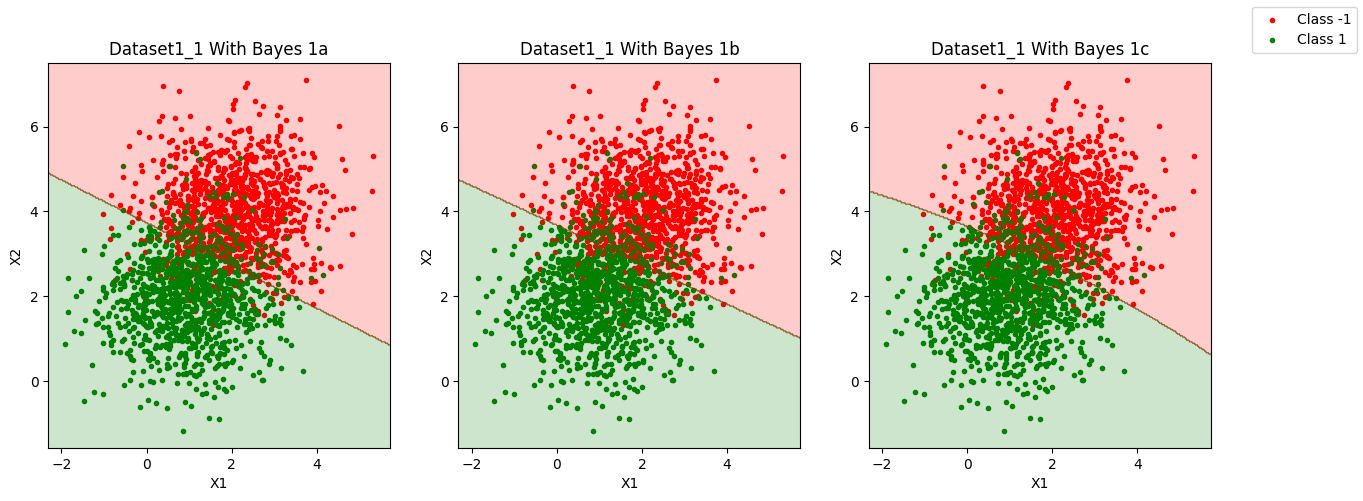

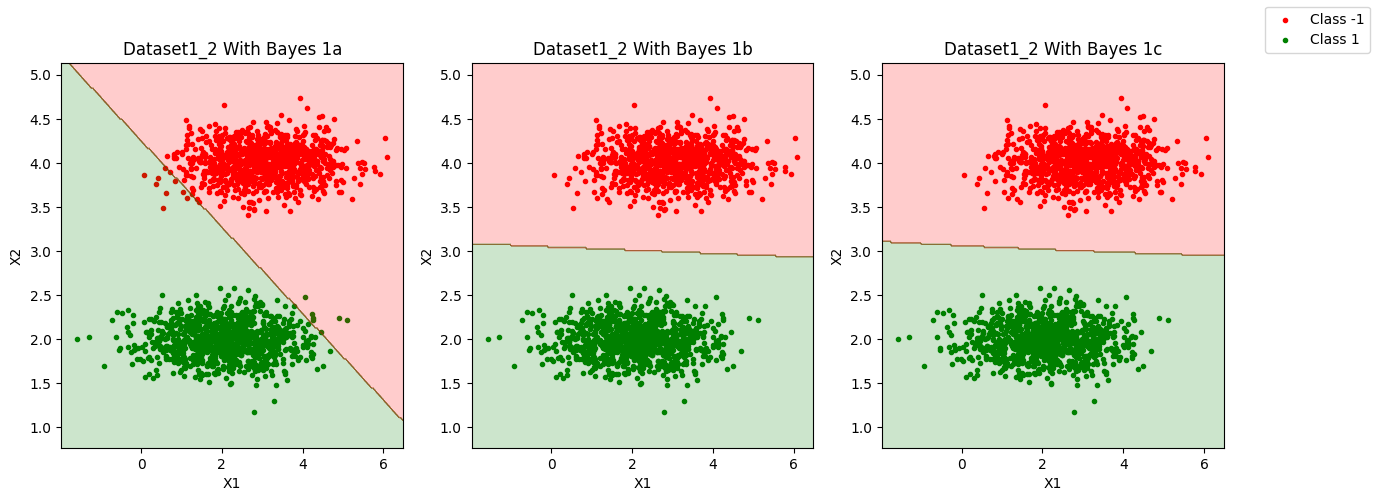

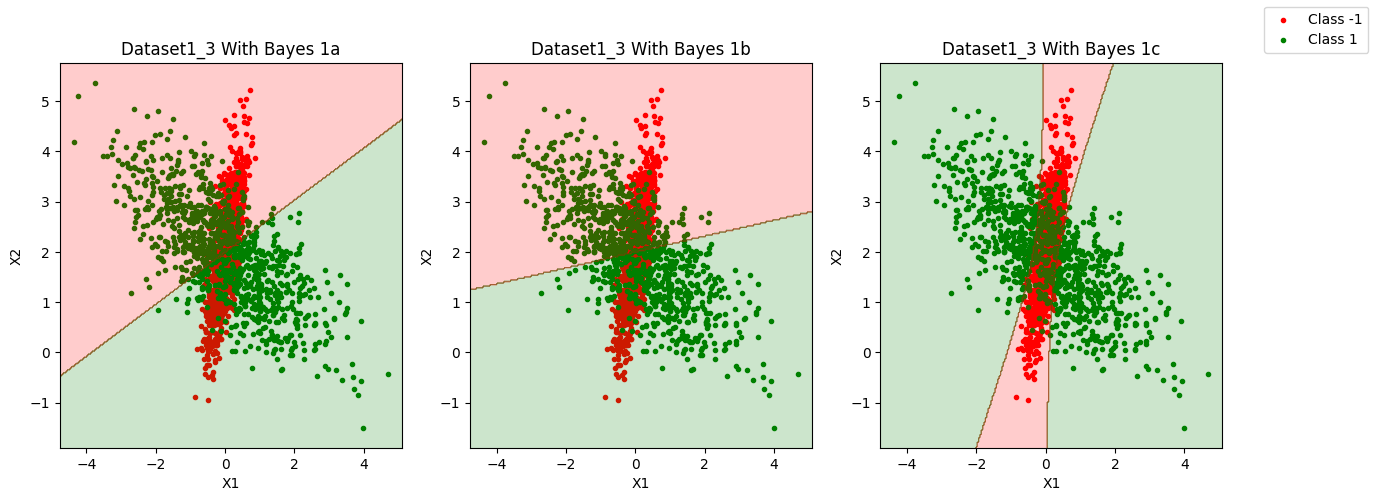

[[0.126  0.1245 0.1245]
 [0.0085 0.     0.    ]
 [0.497  0.495  0.135 ]]


In [ ]:
test_error = np.zeros((3,3))
markers = ['.', '.']
colors = ['r', 'g'] # red for class -1, green for class 1
for i in range(1, 4):
    # Creating subplots and loading the data
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    filename = '../../Data/dataset1_' + str(i) + '.npz'
    data = np.load(filename)
    # Getting the training and test data
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    # Getting the predictions for the test data
    Y_test_pred1 = Bayes1a(X_train, Y_train, X_test)
    Y_test_pred2 = Bayes1b(X_train, Y_train, X_test)
    Y_test_pred3 = Bayes1c(X_train, Y_train, X_test)
    test_error[i-1][0]=np.mean(Y_test_pred1!=Y_test)
    test_error[i-1][1]=np.mean(Y_test_pred2!=Y_test)
    test_error[i-1][2]=np.mean(Y_test_pred3!=Y_test)
    # Creating a grid of points for plotting the decision boundary
    max_X = np.max(X_train[:, 0])
    min_X = np.min(X_train[:, 0])
    max_Y = np.max(X_train[:, 1])
    min_Y = np.min(X_train[:, 1])
    size = 250
    X, Y = np.meshgrid(np.linspace(min_X-0.4, max_X+0.4, size), np.linspace(min_Y-0.4, max_Y+0.4, size))
    X_plotter = np.zeros((size**2, 2))
    for j in range(size):
        for k in range(size):
            X_plotter[j*size+k, 0] = X[j, k]
            X_plotter[j*size+k, 1] = Y[j, k]

    line = [0, 0]
    # Plotting Bayes1a decision making for the dataset
    ax[0].set_title("Dataset1_" + str(i) + " With Bayes 1a")
    for j in range(2):
        line[j] = ax[0].scatter(X_train[Y_train == 2*j-1, 0], X_train[Y_train == 2*j-1, 1], marker=markers[j], c=colors[j])

    Z = Bayes1a(X_train, Y_train, X_plotter)
    Z = Z.reshape(size, size)
    ax[0].set_xlabel("X1")
    ax[0].set_ylabel("X2")
    ax[0].contourf(X, Y, Z, colors=['r', 'g'], alpha=0.2)

    # Plotting Bayes1b decision making for the dataset
    ax[1].set_title("Dataset1_" + str(i) + " With Bayes 1b")
    for j in range(2):
        ax[1].scatter(X_train[Y_train == 2*j-1, 0], X_train[Y_train == 2*j-1, 1], marker=markers[j], c=colors[j])

    Z = Bayes1b(X_train, Y_train, X_plotter)
    Z = Z.reshape(size, size)
    ax[1].set_xlabel("X1")
    ax[1].set_ylabel("X2")
    ax[1].contourf(X, Y, Z, colors=['r', 'g'], alpha=0.2)

    # Plotting Bayes1c decision making for the dataset
    ax[2].set_title("Dataset1_" + str(i) + " With Bayes 1c")
    for j in range(2):
        ax[2].scatter(X_train[Y_train == 2*j-1, 0], X_train[Y_train == 2*j-1, 1], marker=markers[j], c=colors[j])

    Z = Bayes1c(X_train, Y_train, X_plotter)
    Z = Z.reshape(size, size)
    ax[2].set_xlabel("X1")
    ax[2].set_ylabel("X2")
    ax[2].contourf(X, Y, Z, colors=['r', 'g'], alpha=0.2)

    # Setting the legend and displaying the figure
    fig.legend(line, ["Class -1", "Class 1"], loc='upper right')
    plt.show()
#print(test_error)

** Cell type : TextWrite **
## Error Table
| Dataset | Bayes1a | Bayes1b | Bayes1c |
|---------|---------|---------|---------|
| 1_1     |  0.126  |  0.1245 |  0.1245 |
| 1_2     |  0.0085 |   0.0   |   0.0   |
| 1_3     |  0.497  |  0.495  |  0.135  |

1) Bayes1a classifier has undertake most number of estimation it only take consideration of mean of two class and estimate the results.While it performs well for dataset1 and dataset2 but fail in case of dataset3.</br>
2) Bayes2a classifier has undertake moderate estimation where it consider same covariance for both the class conditional.It works well in dataset2 but still fails to for dataset3.</br>
3)Bayes3a classifier has least number of estimation it consider different mean and covariance for both the classifier. It allows non linear boundaries since it consider different covariance matrix for both the cases.</br>

So,best classifier will be bayes3a>bayes2a>bayes1a.




** Cell type : TextRead **


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [ ]:
# Cell type : CodeWrite
# Fill in functions in this cell
L = np.array([[0, 1, 2, 3],
              [1, 0, 1, 2],
              [2, 1, 0, 1],
              [3, 2, 1, 0]])
def normalPdf(X,mean,cov):
  x1=np.array(X-mean)
  #print(x1.shape)
  x2=np.transpose(x1)
  covin=np.linalg.inv(cov)
  #print(x2.shape)
  prod=np.matmul(x2,covin)
  expone=(-0.5)*np.dot(prod,x1)
  norma=np.linalg.det(cov)*((2*np.pi)**(mean.shape[0]))
  norma=1/np.sqrt(norma)
  return (norma*np.exp(expone))

def Bayes2a(X_train, Y_train, X_test):

  X_train_class1=X_train[Y_train==1]
  X_train_class2=X_train[Y_train==2]
  X_train_class3=X_train[Y_train==3]
  X_train_class4=X_train[Y_train==4]
  priora=(X_train_class1.shape[0]/X_train.shape[0])
  priorb=(X_train_class2.shape[0]/X_train.shape[0])
  priorc=(X_train_class3.shape[0]/X_train.shape[0])
  priord=(X_train_class4.shape[0]/X_train.shape[0])
  mu1=np.mean(X_train_class1, axis=0)
  mu2=np.mean(X_train_class2, axis=0)
  mu3=np.mean(X_train_class3, axis=0)
  mu4=np.mean(X_train_class4, axis=0)
  mu=np.array([mu1,mu2,mu3,mu4])
  cov1=np.eye(mu1.shape[0])
  Y_test=np.zeros(X_test.shape[0])
  error=np.zeros(4)
  for i in range(X_test.shape[0]):
    eta=np.array([priora*normalPdf(X_test[i],mu1,cov1),priorb*normalPdf(X_test[i],mu2,cov1),priorc*normalPdf(X_test[i],mu3,cov1),priord*normalPdf(X_test[i],mu4,cov1)])
    error=np.matmul(L,eta)
    Y_test[i]=np.argmin(error) + 1
  return Y_test










  """ Give Bayes classifier prediction for test instances
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """

def Bayes2b(X_train, Y_train, X_test):
  X_train_class1=X_train[Y_train==1]
  X_train_class2=X_train[Y_train==2]
  X_train_class3=X_train[Y_train==3]
  X_train_class4=X_train[Y_train==4]
  priora=(X_train_class1.shape[0]/X_train.shape[0])
  priorb=(X_train_class2.shape[0]/X_train.shape[0])
  priorc=(X_train_class3.shape[0]/X_train.shape[0])
  priord=(X_train_class4.shape[0]/X_train.shape[0])
  mu1=np.mean(X_train_class1, axis=0)
  mu2=np.mean(X_train_class2, axis=0)
  mu3=np.mean(X_train_class3, axis=0)
  mu4=np.mean(X_train_class4, axis=0)
  cov1=np.cov(X_train_class3.T)
  Y_test=np.zeros(X_test.shape[0])
  error=np.zeros(4)
  for i in range(X_test.shape[0]):
    eta=np.array([priora*normalPdf(X_test[i],mu1,cov1),priorb*normalPdf(X_test[i],mu2,cov1),priorc*normalPdf(X_test[i],mu3,cov1),priord*normalPdf(X_test[i],mu4,cov1)])
    error=np.matmul(L,eta)
    Y_test[i]=np.argmin(error) + 1
  return Y_test


  """ Give Bayes classifier prediction for test instances
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """

def Bayes2c(X_train, Y_train, X_test):
  X_train_class1=X_train[Y_train==1]
  X_train_class2=X_train[Y_train==2]
  X_train_class3=X_train[Y_train==3]
  X_train_class4=X_train[Y_train==4]
  priora=(X_train_class1.shape[0]/X_train.shape[0])
  priorb=(X_train_class2.shape[0]/X_train.shape[0])
  priorc=(X_train_class3.shape[0]/X_train.shape[0])
  priord=(X_train_class4.shape[0]/X_train.shape[0])
  mu1=np.mean(X_train_class1, axis=0)
  mu2=np.mean(X_train_class2, axis=0)
  mu3=np.mean(X_train_class3, axis=0)
  mu4=np.mean(X_train_class4, axis=0)
  cov1=np.cov(X_train_class1.T)
  cov2=np.cov(X_train_class2.T)
  cov3=np.cov(X_train_class3.T)
  cov4=np.cov(X_train_class4.T)
  Y_test=np.zeros(X_test.shape[0])
  error=np.zeros(4)
  for i in range(X_test.shape[0]):
    eta=np.array([priora*normalPdf(X_test[i],mu1,cov1),priorb*normalPdf(X_test[i],mu2,cov2),priorc*normalPdf(X_test[i],mu3,cov3),priord*normalPdf(X_test[i],mu4,cov4)])
    error=np.matmul(L,eta)
    Y_test[i]=np.argmin(error) + 1
  return Y_test
  """ Give Bayes classifier prediction for test instances
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """








In [ ]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
#print(np.mean(Y_pred_test_2a==Y_test))
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
#print(np.mean(Y_pred_test_2b==Y_test))
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)
#print(np.mean(Y_pred_test_2c==Y_test))

0.70325
0.70075
0.70325


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately.

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets.


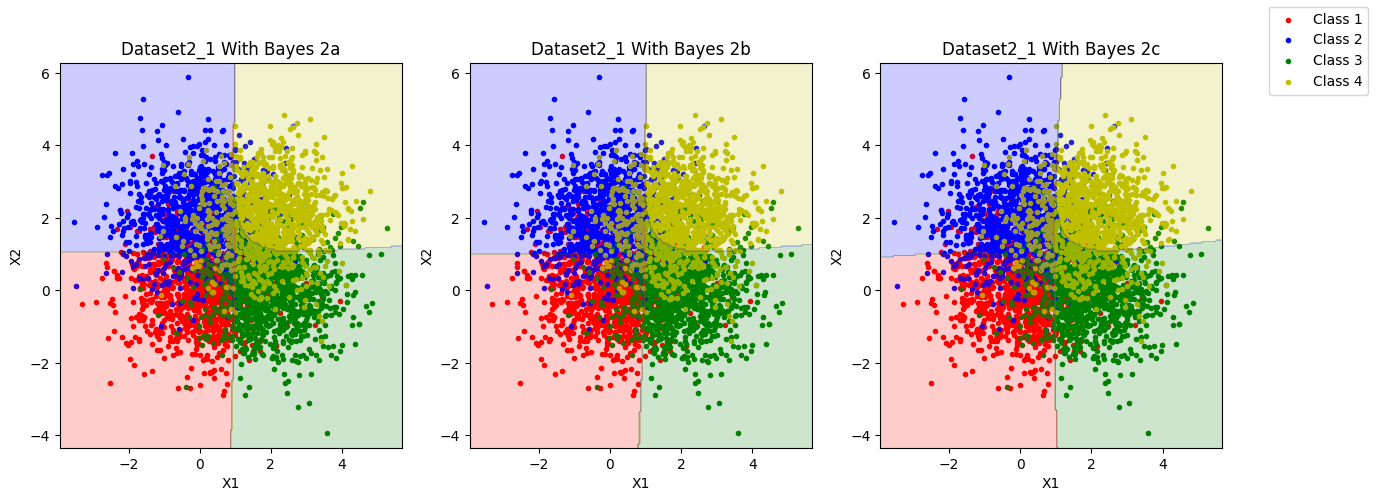

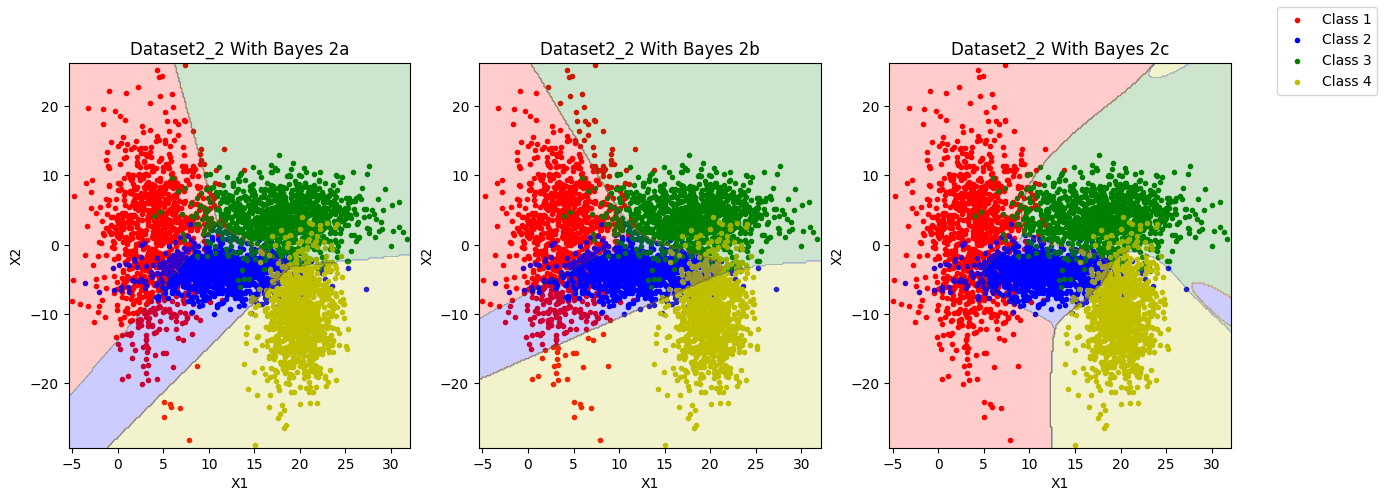

In [ ]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here.
# (Use the functions written previously.)
loss_matrix = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])
test_error = np.zeros((2,3))
def getConfusionMatrix(Y_test, Y_pred):
    """ Returns the confusion matrix for the given test labels and predicted labels"""
    confusion_matrix = np.zeros((4, 4), dtype=int)
    for i in range(Y_test.shape[0]):
        confusion_matrix[int(Y_test[i])-1][int(Y_pred[i])-1] += 1
    return confusion_matrix


markers = ['.', '.', '.', '.']
colors = ['r', 'b', 'g', 'y']
expected_loss_matrix = []
confusion_matrix_full = []

for i in range(1, 3):
    filename = '../../Data/dataset2_' + str(i) + '.npz'
    data = np.load(filename)
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    Y_test_pred1 = Bayes2a(X_train, Y_train, X_test)
    Y_test_pred2 = Bayes2b(X_train, Y_train, X_test)
    Y_test_pred3 = Bayes2c(X_train, Y_train, X_test)
    test_error[i-1][0]=np.mean(Y_test_pred1!=Y_test)
    test_error[i-1][1]=np.mean(Y_test_pred2!=Y_test)
    test_error[i-1][2]=np.mean(Y_test_pred3!=Y_test)
    confusion_matrix = []
    confusion_matrix.append(getConfusionMatrix(Y_test, Y_test_pred1))
    confusion_matrix.append(getConfusionMatrix(Y_test, Y_test_pred2))
    confusion_matrix.append(getConfusionMatrix(Y_test, Y_test_pred3))
    confusion_matrix_full.append(confusion_matrix)
    expected_loss = [0, 0, 0]
    for j in range(3):
        expected_loss[j] = np.sum(np.multiply(loss_matrix, confusion_matrix[j]))/Y_test.shape[0]
    expected_loss_matrix.append(expected_loss)
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    size = 250
    max_X = np.max(X_train[:, 0])
    min_X = np.min(X_train[:, 0])
    max_Y = np.max(X_train[:, 1])
    min_Y = np.min(X_train[:, 1])
    X, Y = np.meshgrid(np.linspace(min_X-0.4, max_X+0.4, size), np.linspace(min_Y-0.4, max_Y+0.4, size))
    X_plotter = np.zeros((size**2, 2))
    for j in range(size):
        for k in range(size):
            X_plotter[j*size+k, 0] = X[j, k]
            X_plotter[j*size+k, 1] = Y[j, k]

    line = [0, 0, 0, 0]
    ax[0].set_title("Dataset2_" + str(i) + " With Bayes 2a")
    for j in range(4):
        line[j] = ax[0].scatter(X_train[Y_train == j+1, 0], X_train[Y_train == j+1, 1], marker=markers[j], color=colors[j])

    Z = Bayes2a(X_train, Y_train, X_plotter)
    Z = Z.reshape((size, size))
    ax[0].set_xlabel("X1")
    ax[0].set_ylabel("X2")
    ax[0].contourf(X, Y, Z, alpha=0.2, colors=['r', 'g', 'b', 'y'])
    ax[1].set_title("Dataset2_" + str(i) + " With Bayes 2b")
    for j in range(4):
        ax[1].scatter(X_train[Y_train == j+1, 0], X_train[Y_train == j+1, 1], marker=markers[j], color=colors[j])

    Z = Bayes2b(X_train, Y_train, X_plotter)
    Z = Z.reshape((size, size))
    ax[1].set_xlabel("X1")
    ax[1].set_ylabel("X2")
    ax[1].contourf(X, Y, Z, alpha=0.2, colors=['r', 'g', 'b', 'y'])
    ax[2].set_title("Dataset2_" + str(i) + " With Bayes 2c")
    for j in range(4):
        ax[2].scatter(X_train[Y_train == j+1, 0], X_train[Y_train == j+1, 1], marker=markers[j], color=colors[j])

    Z = Bayes2c(X_train, Y_train, X_plotter)
    Z = Z.reshape((size, size))
    ax[2].set_xlabel("X1")
    ax[2].set_ylabel("X2")
    ax[2].contourf(X, Y, Z, alpha=0.2, colors=['r', 'g', 'b', 'y'])
    fig.legend(line, ['Class 1', 'Class 2', 'Class 3', 'Class 4'], loc='upper right')
    plt.show()



** Cell type : TextWrite **
(Write your observations and table of errors here)
Observation:-
1) Out of the 3 classifier bayes2c is the best classifier as it consider the least amount of asumption as only guassian class conditional.
2)Bayes2a classifier has undertake most number of estimation it only take consideration of mean of two class and estimate the results.While it performs well for dataset1 and dataset2 but fail in case of dataset3.
3 ) Bayes2b classifier has undertake moderate estimation where it consider same covariance for both the class conditional.It works well in dataset2 but still fails to for dataset3.

Best classifier:-Bayes2c>Bayes2b>Bayes2a

## Expected Loss Table
| Dataset | Bayes2a | Bayes2b | Bayes2c |
|---------|---------|---------|---------|
| 2_1     |0.42975  |0.42925    |  0.428|
| 2_2     |0.1835   |0.2335   |  0.1405|

## Confusion Table
Table Organised as follows: Rows are the true labels, columns are the predicted labels.

### Bayes2a -> Dataset 2_1
| True/Pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 633 | 219 | 136 | 12 |
| **2** | 97 | 738 | 62 | 103 |
| **3** | 86 | 49 | 770 | 95 |
| **4** | 15 | 136 | 194 | 655 |

### Bayes2b -> Dataset 2_1
| True/pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 636 | 215 | 137 | 12 |
| **2** | 99 | 739 | 60 | 102 |
| **3** | 85 | 48 | 772 | 95 |
| **4** | 16 | 137 | 194 | 653 |

### Bayes2c -> Dataset 2_1
| True/Pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 633 | 218 | 138 | 11 |
| **2** | 99 | 742 | 61 | 98 |
| **3** | 87 | 47 | 772 | 94 |
| **4** | 15 | 134 | 201 | 650 |

### Bayes2a -> Dataset 2_2
| True/Pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 830 | 150 | 18 | 2 |
| **2** | 93 | 784 | 46 | 77 |
| **3** | 30 | 61 | 905 | 4 |
| **4** | 0 | 23 | 78 | 899 |

### Bayes2b -> Dataset 2_2
| True/Pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 694 | 222 | 53 | 31 |
| **2** | 58 | 871| 31 | 40 |
| **3** | 23 | 106 | 864 | 7 |
| **4** | 0 | 5 | 102 | 893 |

### Bayes2c -> Dataset 2_2
| True/Pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 901 | 80 | 19 | 0 |
| **2** | 64 | 824 | 47 | 65 |
| **3** | 19 | 31 | 936 | 14 |
| **4** | 0 | 36 | 48 | 916 |

## Misclassification Error Table
| Dataset | Bayes2a | Bayes2b | Bayes2c |
|---------|---------|---------|---------|
| 2_1     |  0.301  |   0.3   |  0.30075 |
| 2_2     |  0.1455 | 0.17525 | 0.10575 |




In [ ]:
# Cell type: convenience



**Cell type : TextRead**


# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels .

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




Minimum MSE Error for Test data is  0.15673525917060396 for subset of size : 50
The best degree is 2
The best regularisation parameter is  0.1


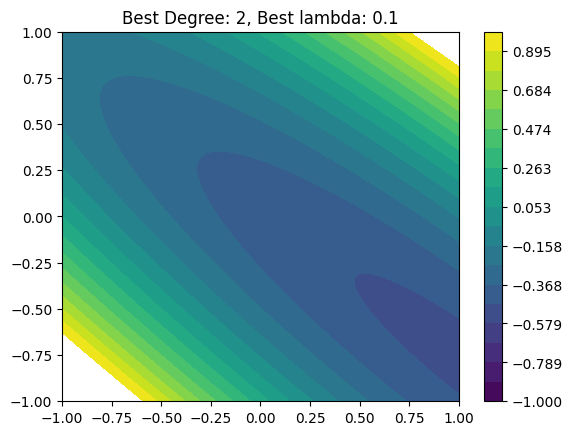

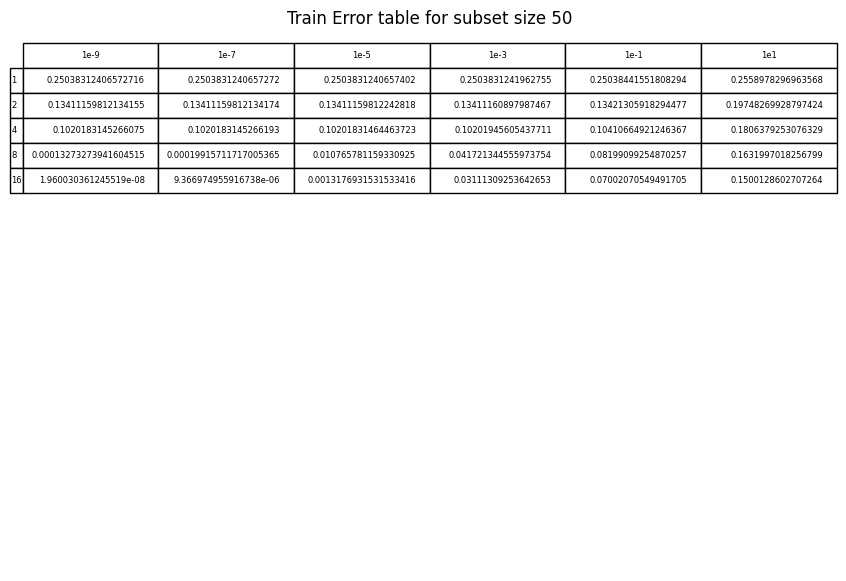

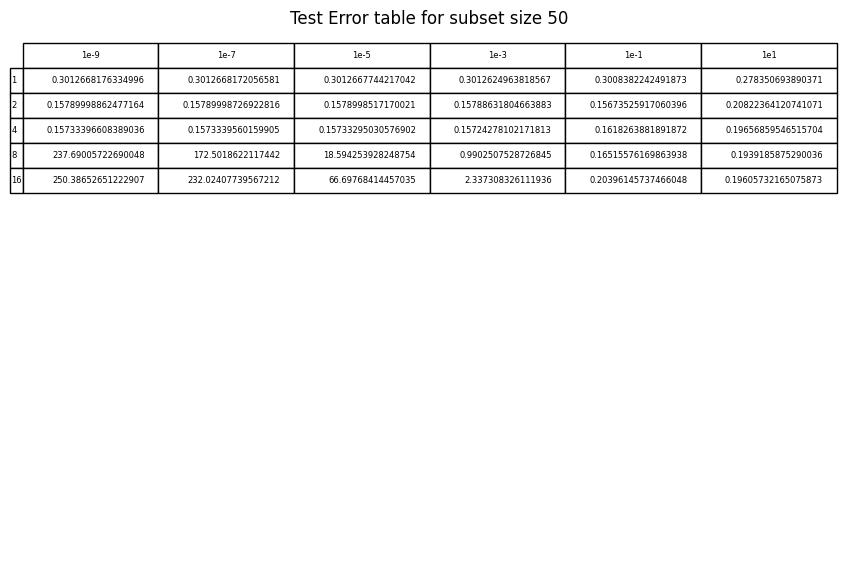

Minimum MSE Error for Test data is  0.1427757518683774 for subset of size : 100
The best degree is 4
The best regularisation parameter is  1e-09


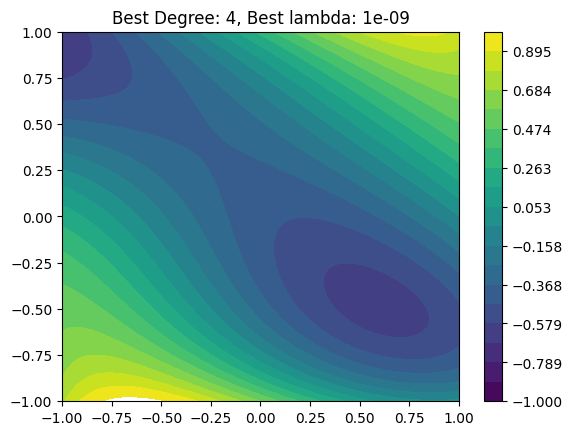

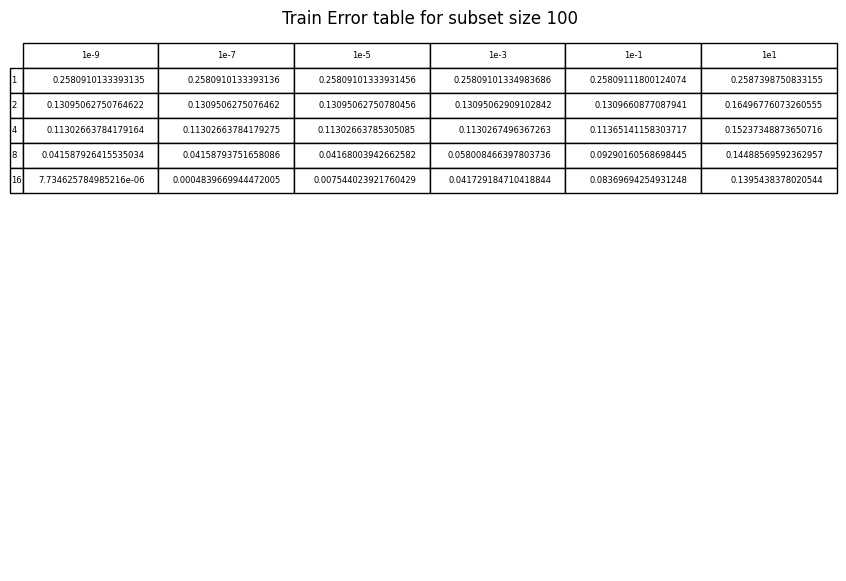

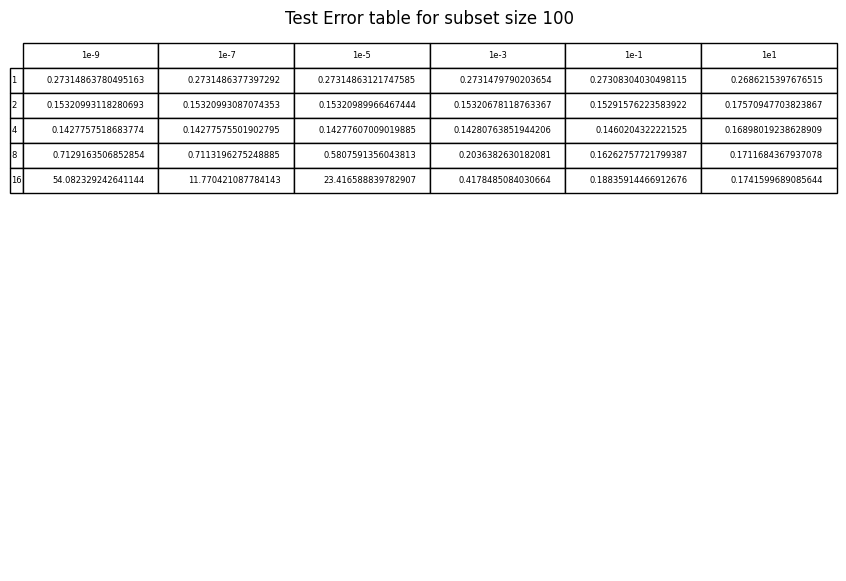

Minimum MSE Error for Test data is  0.0371498263951681 for subset of size : 200
The best degree is 16
The best regularisation parameter is  1e-09


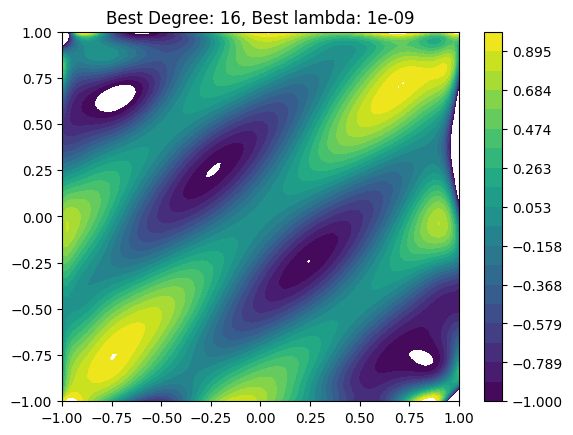

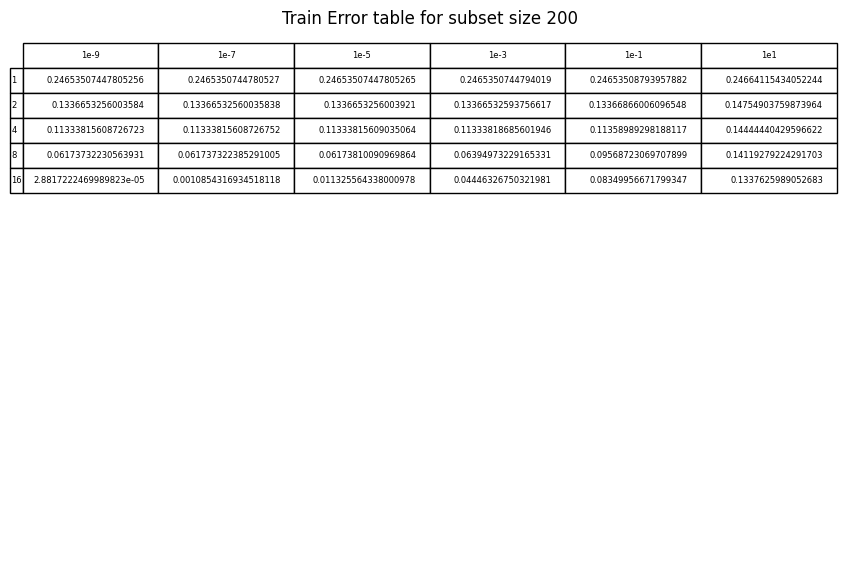

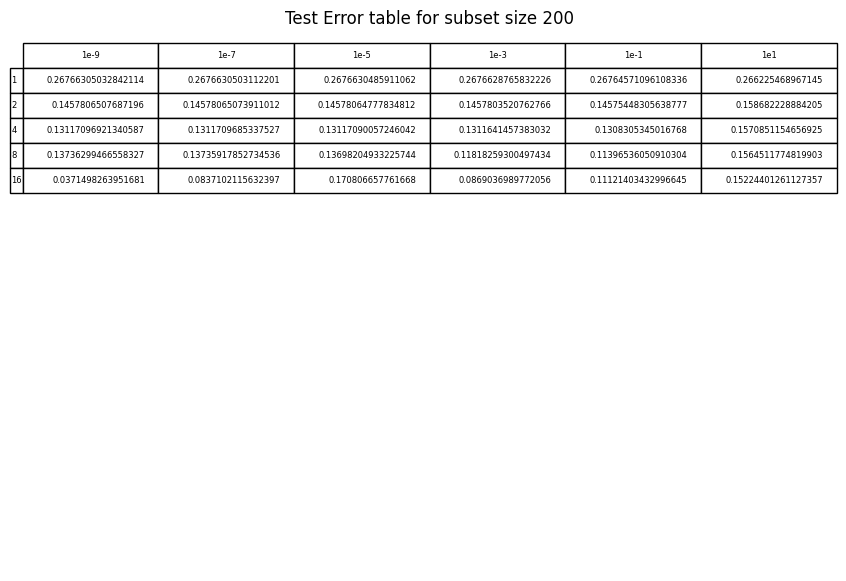

Minimum MSE Error for Test data is  0.001197735136141846 for subset of size : 1000
The best degree is 16
The best regularisation parameter is  1e-09


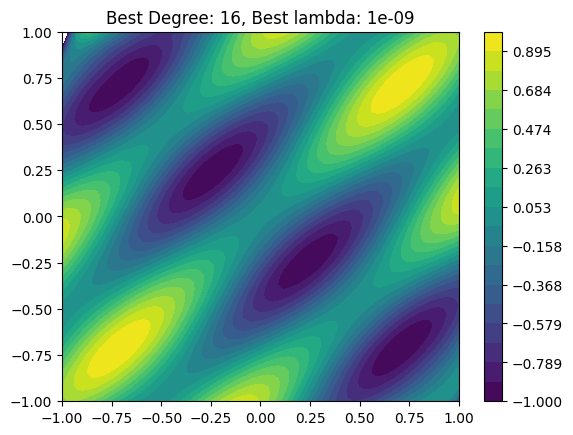

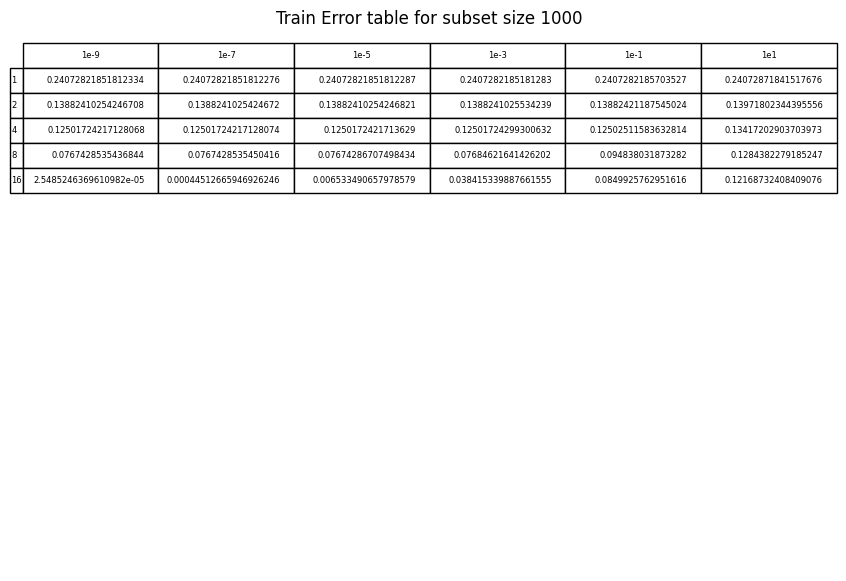

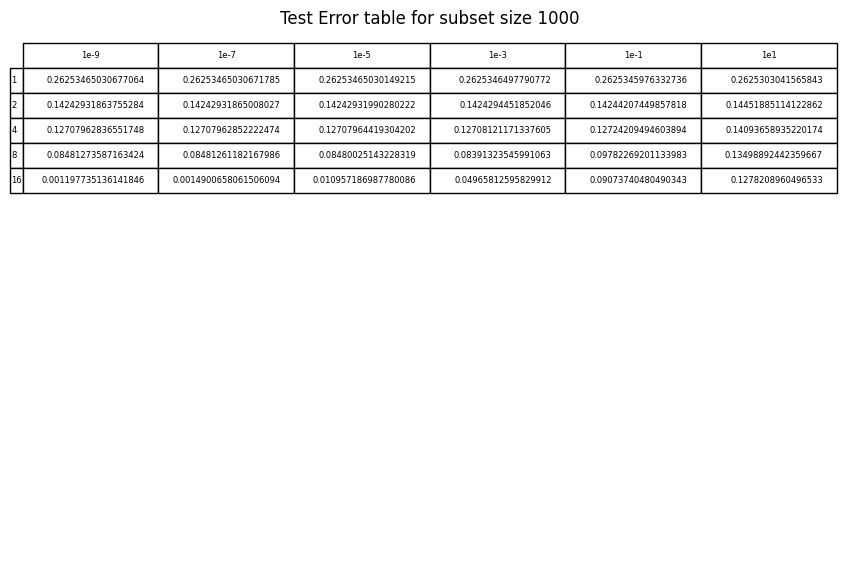

In [ ]:
degreeArray=[1,2,4,8,16]
lambdapara =[1e-9,1e-7,1e-5,1e-3,1e-1,1e1]
Setsample=[50,100,200,1000]
def feature_mapping(X,degree):
  phi_x=[]
  temp=[]
  for d in range(X.shape[0]):
    temp=[]
    for i in range(degree+1):
      for j in range(degree+1):
        if(i+j<=degree):
          temp.append((X[d,0]**i)*X[d,1]**j)
    phi_x.append(temp)

  return(np.array(phi_x))
def squareLossCal(Y_pred,Y_ori):
  sum=0
  for i in range(Y_pred.shape[0]):
    sum=sum+(Y_pred[i]-Y_ori[i])**2
  return sum/Y_pred.shape[0]
def ridgeregressionCal(x_train,y_train,degree,ridgeCoeef):
  phi_x=feature_mapping(x_train,degree)
  x_transpose=phi_x.transpose()
  k=np.matmul(x_transpose,phi_x)
  k=k+ridgeCoeef*np.eye(k.shape[0])
  y=np.linalg.inv(k)
  k1=np.matmul(y,x_transpose)
  #print(y_train.shape)
  w=np.matmul(k1,y_train)
  return w
def ridgeregressionpred(x_test,w,degree):
  phi_x_test=feature_mapping(x_test,degree)
  y_predicted=np.matmul(phi_x_test,w)
  return y_predicted
def plotTable(errortable,stir):
  row_indices = ['1', '2', '4','8','16']
  col_indices = ['1e-9', '1e-7', '1e-5','1e-3','1e-1','1e1']
  plt.figure(figsize=(7, 7))
  table = plt.table(cellText=errortable,rowLabels=row_indices,colLabels=col_indices,loc='upper center',cellLoc='right')
  table.auto_set_font_size(False)
  table.set_fontsize(6)
  table.scale(1.5, 1.5)
  plt.title(stir)
  plt.axis('off')
  plt.ion()
  plt.show()
  #plt.close()
def drawcontour(w,degree,stir):
  x_axis,y_axis=np.meshgrid(np.linspace(-1,1,80),np.linspace(-1,1,80))
  x_matrix = np.column_stack((x_axis.flatten(), y_axis.flatten()))
  z_axis=ridgeregressionpred(x_matrix,w,degree)
  z_axis = z_axis.reshape(x_axis.shape[0], x_axis.shape[1])
  plt.contourf(x_axis,y_axis,z_axis,levels=np.linspace(-1.,1. , 20))
  plt.title(stir)
  plt.colorbar()
  plt.show()





data = np.load("../../Data/dataset3_1.npz")
x_train=data["arr_0"]
y_train=data["arr_1"]
x_test=data["arr_2"]
y_test=data["arr_3"]
for sample in Setsample:
  random_samples_x=x_train[:sample]
  random_samples_y=y_train[:sample]
  err_table_train=[]
  err_table_test=[]
  for degree in degreeArray:
    err_table_train_local=[]
    err_table_test_local=[]
    #minlambda,mindegree=()
    for lambd in lambdapara:
      w=ridgeregressionCal(random_samples_x,random_samples_y,degree,lambd)
      y_train_predict=ridgeregressionpred(random_samples_x,w,degree)
      y_test_predict=ridgeregressionpred(x_test,w,degree)
      mse=squareLossCal(y_train_predict,random_samples_y)
      err_table_train_local.append(mse)
      mse1=squareLossCal(y_test_predict,y_test)
      err_table_test_local.append(mse1)
    err_table_train.append(err_table_train_local)
    err_table_test.append(err_table_test_local)
  index=np.argmin(err_table_test)
  mindegree=(index//6)
  minlambda=(index%6)
  w=ridgeregressionCal(random_samples_x,random_samples_y,degreeArray[mindegree],lambdapara[minlambda])
  #print(degreeArray[mindegree],lambdapara[minlambda])
  #print("Minimum MSE Error for Test data is " ,err_table_test[mindegree][minlambda],"for subset of size :" ,sample)
  #print("The best degree is",degreeArray[mindegree])
  #print("The best regularisation parameter is ",lambdapara[minlambda])
  drawcontour(w,degreeArray[mindegree],"Best Degree: " + str(degreeArray[mindegree]) + ", Best lambda: " + str(lambdapara[minlambda]))
  plotTable(np.array(err_table_train),"Train Error table for subset size "+ str(sample))
  plotTable(np.array(err_table_test),"Test Error table for subset size "+ str(sample))







** Cell type : TextWrite **

**Observations:-**
1. Training error is always less than the test error which is true as data is trained using training data and tested using test data.We always consider the test error as the best performance of the model.
2. For smaller subset of the data higher degree polynomial and lower regularisation coefficient seems to be overfit the data due to which test mse for that degree and regularisation coefficient pair is very high.
3. The data seems to be a higher dimentional data as we increase the subset size the the MSE for test data seems to be reduce as we approach higher degree and lower regularisation coefficient.

**Cell type : TextRead**


# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given.

Summarise your findings and conclusions in the final textcell. e.g. what happens when tau, sigma and number of data points are increased.

Hint 1: In class we saw the expression for posterior of W, but only used it to find the MAP estimate. But it can be analysed in greater detail. You may read up classic textbooks like Bishop to figure out the posterior or work it out yourself. This is not too hard.

Hint 2: In particular, observe that the posterior looks like a product of exponential functions, and the term inside the exponent is always a degree 2 (or less) function of w. Can you think of any distribution which looks like that?











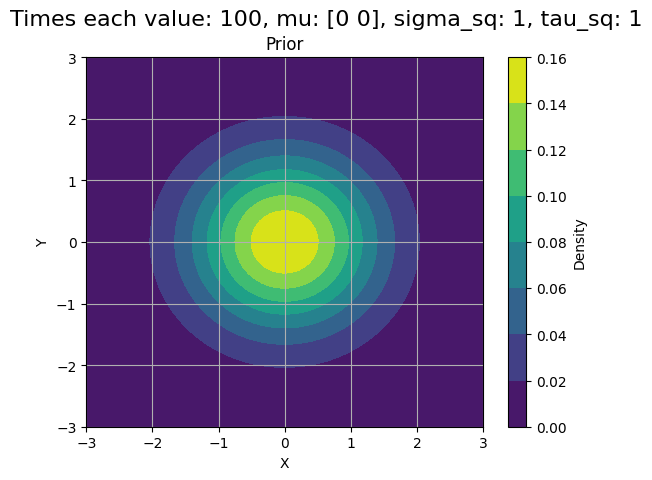

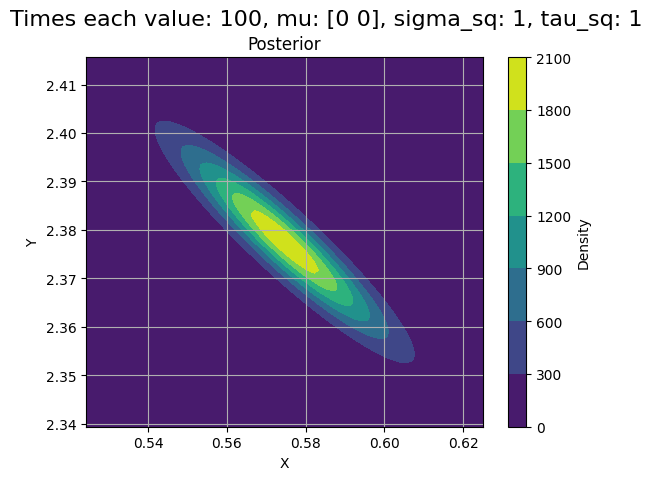

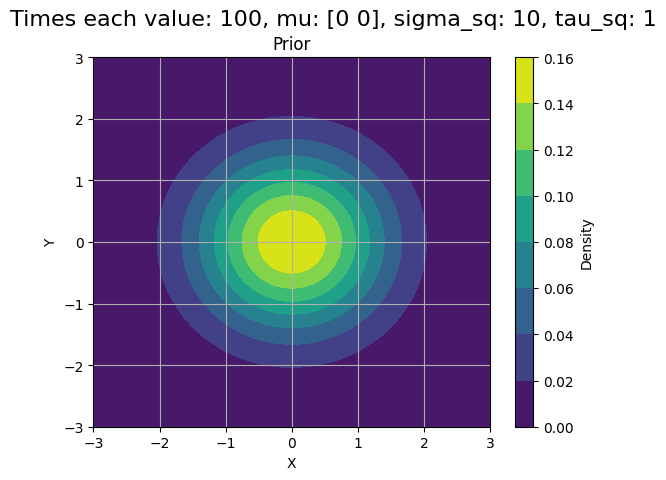

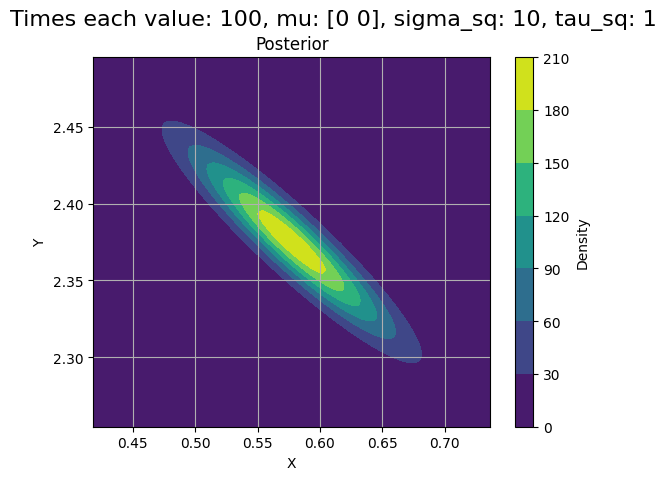

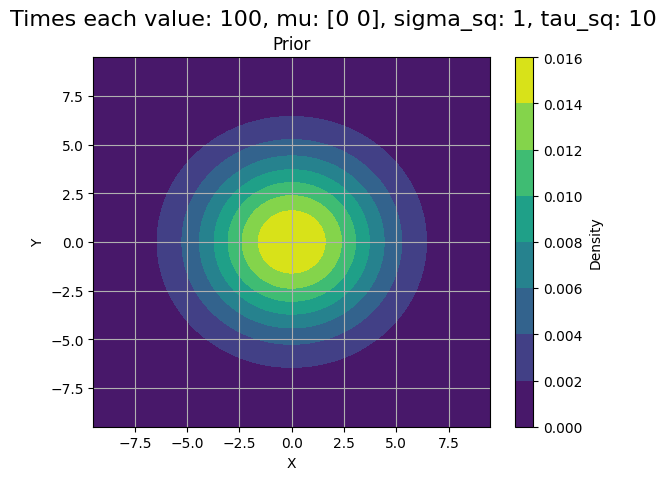

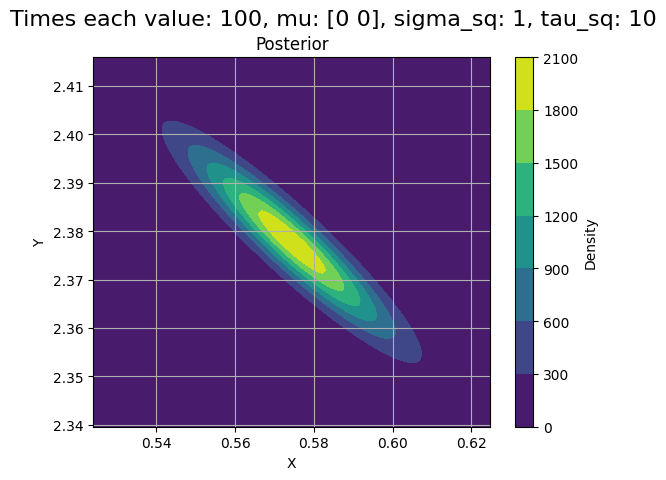

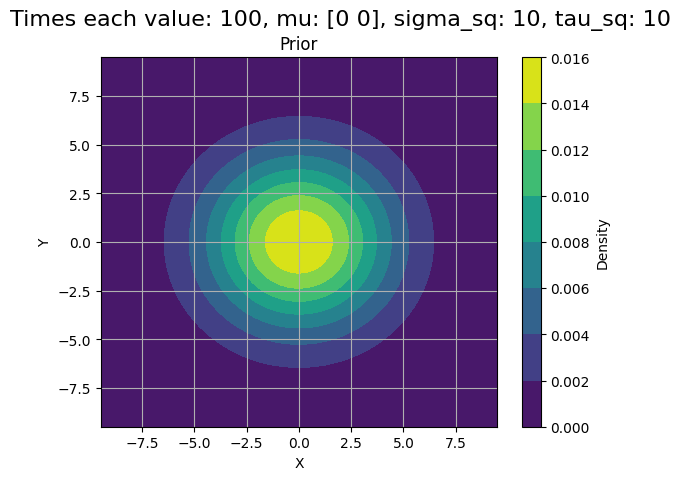

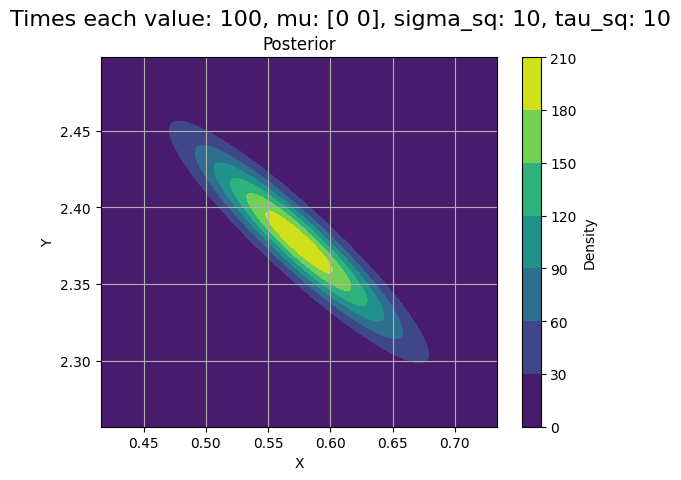

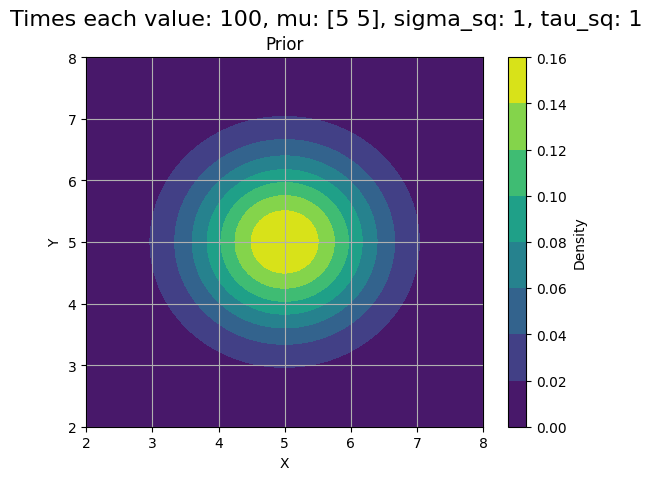

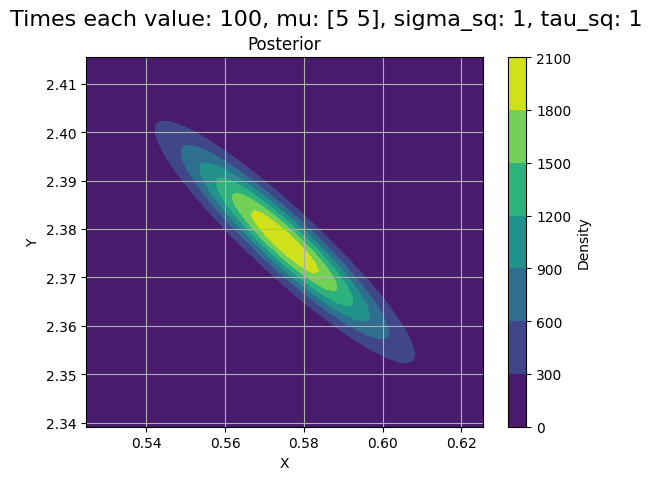

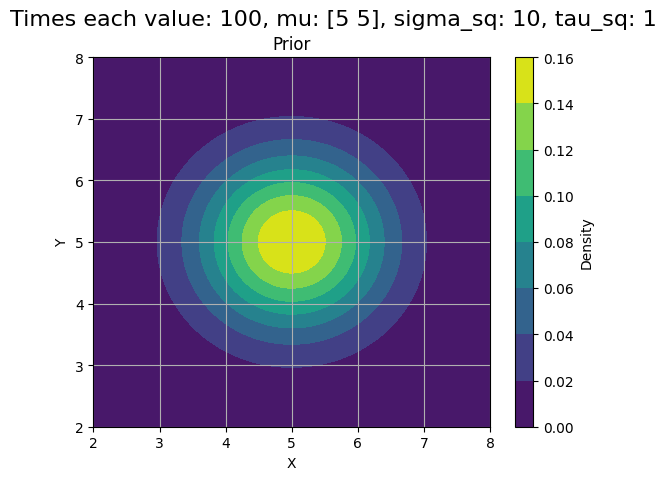

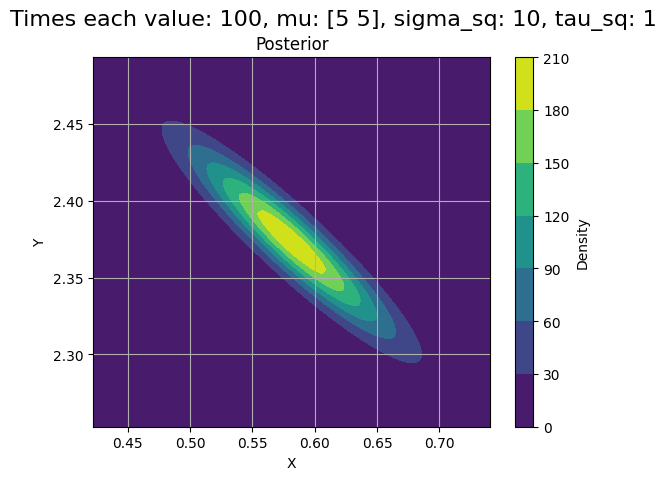

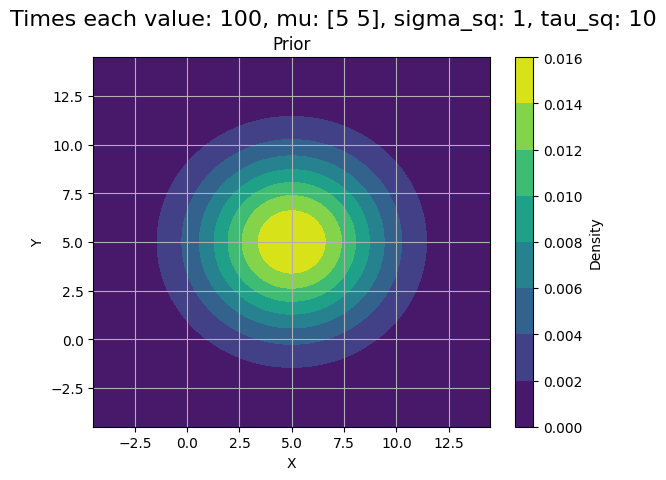

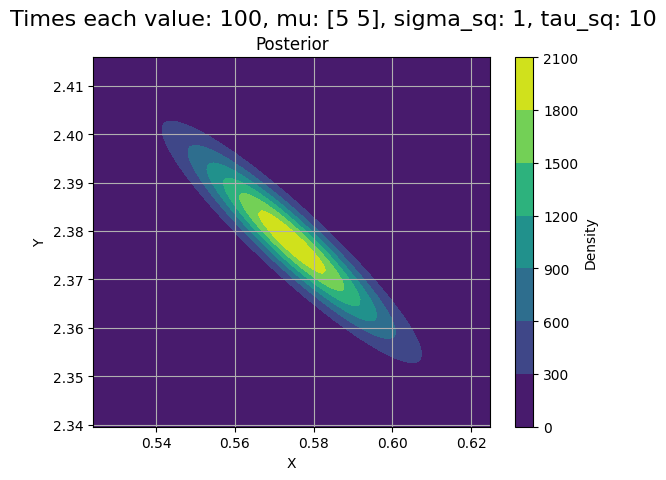

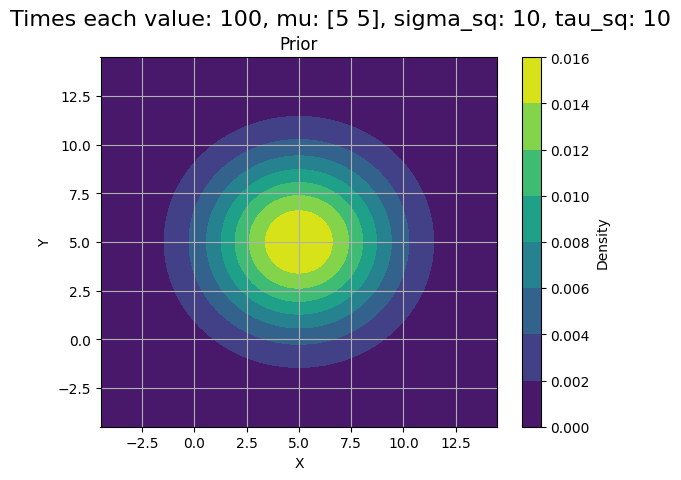

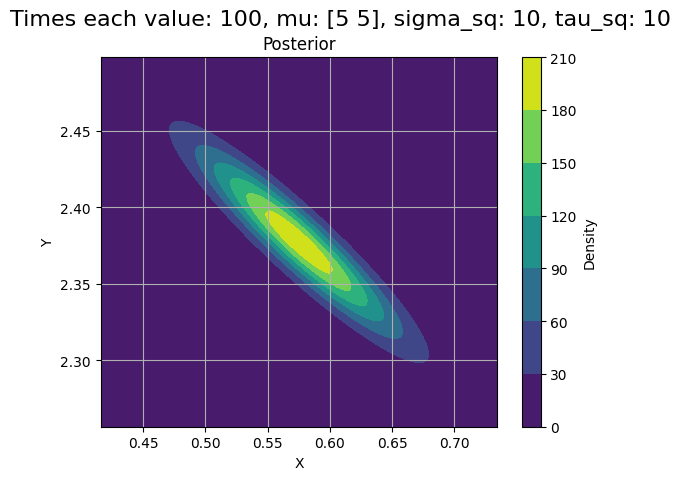

In [ ]:
def normalPdf(X,mean,cov):
  x1=np.array(X-mean)
  #print(x1.shape)
  x2=np.transpose(x1)
  covin=np.linalg.inv(cov)
  #print(x2.shape)
  prod=np.matmul(x2,covin)
  expone=(-0.5)*np.dot(prod,x1)
  norma=np.linalg.det(cov)*((2*np.pi)**(mean.shape[0]))
  norma=1/np.sqrt(norma)
  return (norma*np.exp(expone))

def posteriorMean(covn,tau,mean,sigma,X,Y):
   t1=np.matmul(X.transpose(),Y)/sigma
   t2=np.add(mean/tau,t1)
   return np.matmul(covn,t2)

def posteriorCov(tau,sigma,X):
  t1=np.matmul(X.transpose(),X)/(sigma)
  t2=np.add(np.eye(2)/tau,t1)
  return np.linalg.inv(t2)

def drawcontour(cov,mean,times,stir,sigma,tau,mean1,resolution=100):
    std_dev = np.sqrt(np.diag(cov))
    xlim = (mean[0] - 3 * std_dev[0], mean[0] + 3 * std_dev[0])
    ylim = (mean[1] - 3 * std_dev[1], mean[1] + 3 * std_dev[1])

    x = np.linspace(xlim[0], xlim[1], resolution)
    y = np.linspace(ylim[0], ylim[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
      for j in range(X.shape[1]):
        Xi=np.array([X[i,j],Y[i,j]])
        Z[i,j]=normalPdf(Xi,mean,cov)
    #pos = np.empty(X.shape + (2,))
    #pos[:, :, 0] = X
    #pos[:, :, 1] = Y

   # rv = multivariate_normal(mean, cov)
   # Z = rv.pdf(pos)
    #print(pos.shape)
    ##print(Z.shape)
    plt.contourf(X, Y, Z, cmap='viridis')
    plt.colorbar(label='Density')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.suptitle("Times each value: " + str(times) + ", mu: " + str(mean1) + ", sigma_sq: " + str(sigma) + ", tau_sq: " + str(tau), fontsize=16)
    plt.title(stir)
    plt.grid(True)
    plt.show()




X=[[1.0,2.0],[2.0,2.1],[0.6,1.5],[1.1,0.9]]
X=np.array(X)
Y=[5.1,6.1,4.2,2.9]
Y=np.array(Y)
mean=[0,5]
tau=[1,10]
sigma=[1,10]
x=1
for mu in mean:
  mean1=np.array([mu,mu])
  for ta in tau:
    for sigm in sigma:
      priorCov=ta*np.eye(2)
      posCov=posteriorCov(ta,sigm,X)
      posMean=posteriorMean(posCov,ta,mean1,sigm,X,Y)
      drawcontour(priorCov,mean1,1,"Prior",sigm,ta,mean1)
      drawcontour(posCov,posMean,1,"Posterior",sigm,ta,mean1)
      #print(posMean)
X_400=[]
Y_400=[]
for i in range(X.shape[0]):
  for j in range(100):
    X_400.append(X[i])
    Y_400.append(Y[i])
X_400=np.array(X_400)
Y_400=np.array(Y_400)
for mu in mean:
  mean1=np.array([mu,mu])
  for ta in tau:
    for sigm in sigma:
      priorCov=ta*np.eye(2)
      posCov=posteriorCov(ta,sigm,X_400)
      posMean=posteriorMean(posCov,ta,mean1,sigm,X_400,Y_400)
      drawcontour(priorCov,mean1,100,"Prior",sigm,ta,mean1)
      drawcontour(posCov,posMean,100,"Posterior",sigm,ta,mean1)






** Cell type : TextWrite **
**Observations:-**

Posterior Distribution of W can be easily calculated which also guassian distribution.The parameters are can be calculated as follows,
Covariance($Σ_{N}$):- $(σ^{2}X^{T}X+\tau^{-2}I)^{-1}$ <br>
Mean:- $Σ_{N}(σ^{-2}X^TY+\tau^{-2}μ)$ <br>
Symbols contain their usual notation as describe in the question.
Findings:-


1.   Once we calculated the posterior distribution we can easily found the countour as asked.
2.   In the data if $τ$ is high which implies that the variance is high which mean we don't trust the prior much and if $σ$ is high which implies noise has high variance which means don't trust the data.





**Cell type : TextRead**

# 5. Logistic Regression

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set).

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [ ]:
# CodeWrite
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def ker_mat(X_train,kernel_type,kp):
  if (kernel_type == 'linear'):
    return np.matmul(X_train,X_train.T)
  if (kernel_type == 'poly'):
    return (1+np.matmul(X_train,X_train.T))**kp
  if (kernel_type == 'rbf'):
    return np.exp(-kp*np.sum((X_train[:,None,:]-X_train[None,:,:])**2, axis=2))



def ker_vec_cal(ker_matr,x_test,kernel_type,kp):
  if (kernel_type == 'linear'):
    return np.dot(ker_matr,x_test)
  if (kernel_type == 'poly'):
    return (1+np.dot(ker_matr,x_test))**kp
  if (kernel_type == 'rbf'):
    return np.exp(-kp*np.sum((ker_matr-x_test)**2, axis=1))

def gradient_descent(Y_test,al,phi,rp):
  a1=rp*np.matmul(phi,al)-np.sum(((Y_test*phi)/(1+np.exp(Y_test*np.matmul(al.transpose(),phi)))), axis=1)
  return a1

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0.,
                                   kernel_param=1., num_iter_gd=1000):
  eta=0.1
  phi=ker_mat(X,kernel,kernel_param)
  alpha=np.zeros(X.shape[0])
  while num_iter_gd>0 :
    gradalpha=gradient_descent(Y,alpha,phi,reg_param)
    alpha=alpha-eta*gradalpha
    num_iter_gd=num_iter_gd-1

  return alpha



def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Return the predictions on test_X using the learnt alphas
    """
    test_Y_pred=[]
    for i in range(test_X.shape[0]):
      ker_vec=ker_vec_cal(train_X,test_X[i],kernel,kernel_param)
      ans=np.dot(ker_vec,alpha)
      test_Y_pred.append(np.sign(ans))
    return np.array(test_Y_pred)







In [ ]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below.
kernels=['linear','poly','rbf']
ker_best={'A':{},'B':{},'C':{},'D':{}}
reg_best={'A':{},'B':{},'C':{},'D':{}}
def fetchBestHyperparameter(X,Y,X_test,Y_test,kernel):
  kernel_param=[]
  reg_param=[]
  bkp=0
  brp=0
  highest_accuracy=0
  if kernel=='linear':
    reg_param=[1e-6, 1e-5, 1e-4,0.001, 0.01, 0.1, 1, 10, 100]
    kernel_param=[1]
  elif kernel=='poly':
    reg_param=[1e-6, 1e-5, 1e-4,0.001, 0.01, 0.1, 1, 10, 100]
    kernel_param=[1,2,3,4,5,6,7,8,9,10]
  elif kernel=='rbf':
    reg_param=[1e-6, 1e-5, 1e-4,0.001, 0.01, 0.1, 1, 10, 100]
    kernel_param=[1e-3, 1e-2, 1e-1, 1, 2, 4, 10,50,100]
  for kp in kernel_param:
    for rp in reg_param:
      alpha=train_pred_logistic_regression(X,Y,kernel,rp,kp,98)
      test_y_pred=test_pred(alpha,X,Y,X_test,kernel,kp)
      accuracy = np.mean(test_y_pred == Y_test)
      if(accuracy>highest_accuracy):
        bkp=kp
        brp=rp
        highest_accuracy=accuracy
  #print("Kernel =", kernel, end="")
  #print(": Best_kernel_parameter =", bkp, end="")
  #print(", Best_reg_parameter =", brp)
  #print("Validation Accuracy is =", highest_accuracy, end=" ")
  return bkp,brp,highest_accuracy









for x in ['A','B','C','D']:
  data = np.load('../../Data/dataset_{}.npz'.format(x))
  x_train=data["arr_0"]
  y_train=data["arr_1"]
  x_test=data["arr_2"]
  y_test=data["arr_3"]
  x_train_val=x_train[:int(0.8*x_train.shape[0])]
  y_train_val=y_train[:int(0.8*x_train.shape[0])]
  x_test_val=x_train[int(0.8*x_train.shape[0]):]
  y_test_val=y_train[int(0.8*x_train.shape[0]):]
  print("In Dataset",x)
  print("\n")
  for kernel in kernels:
    a,b,c=fetchBestHyperparameter(x_train_val,y_train_val,x_test_val,y_test_val,kernel)
    ker_best[x][kernel]=a
    reg_best[x][kernel]=b
    alpha=train_pred_logistic_regression(x_train,y_train,kernel,b,a,98)
    train_y_pred=test_pred(alpha,x_train,y_train,x_train,kernel,a)
    train_accuracy=np.mean(train_y_pred==y_train)
    #print("Training Accuracy is =", train_accuracy, end=" ")
    test_y_pred=test_pred(alpha,x_train,y_train,x_test,kernel,a)
    test_accuracy=np.mean(test_y_pred==y_test)
    #print("Test Accuracy is =", test_accuracy, end=" ")
    #print("\n")










#alpha=train_pred_logistic_regression(x_train,y_train,"rbf",1e-6,1,98)
#test_y_pred=test_pred(alpha,x_train,y_train,x_test,"rbf",1)
#print(np.mean(test_y_pred == y_test))

#a,b,c=fetchBestHyperparameter(x_train_val,y_train_val,x_test_val,y_test_val,"rbf")
#print(a,b,c)



In Dataset A


Kernel = linear: Best_kernel_parameter = 1, Best_reg_parameter = 1e-06
Validation Accuracy is = 0.81 Training Accuracy is = 0.8026666666666666 Test Accuracy is = 0.822 

Kernel = poly: Best_kernel_parameter = 2, Best_reg_parameter = 1e-05
Validation Accuracy is = 0.89 Training Accuracy is = 0.8286666666666667 Test Accuracy is = 0.814 

Kernel = rbf: Best_kernel_parameter = 4, Best_reg_parameter = 0.001
Validation Accuracy is = 1.0 Training Accuracy is = 1.0 Test Accuracy is = 0.998 

In Dataset B


Kernel = linear: Best_kernel_parameter = 1, Best_reg_parameter = 1e-06
Validation Accuracy is = 0.7333333333333333 Training Accuracy is = 0.7426666666666667 Test Accuracy is = 0.768 

Kernel = poly: Best_kernel_parameter = 2, Best_reg_parameter = 0.0001
Validation Accuracy is = 0.8 Training Accuracy is = 0.8293333333333334 Test Accuracy is = 0.8 

Kernel = rbf: Best_kernel_parameter = 1, Best_reg_parameter = 0.0001
Validation Accuracy is = 0.7933333333333333 Training Accuracy 

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).

## Best hyperparameter for each kernel type and each dataset

## Dataset A

| Kernel Type | Kernel Parameter | Regularisation Parameter | Training Zero-One Error | Test Zero-One Error |
| :-: | :-: | :-: | :-: | :-: |
| Linear | 1 | 1e-6 | 0.1973 | 0.178 |
| Poly | 2 | 1e-5 | 0.171 | 0.186 |
| RBF | 4 | 0.001 | 0 | 0.002 |



##Dataset B

| Kernel Type | Kernel Parameter | Regularisation Parameter | Training Zero-One Error | Test Zero-One Error |
| :-: | :-: | :-: | :-: | :-: |
| Linear | 1 | 1e-6 | 0.257 | 0.232 |
| Poly | 2 | 1e-4 | 0.171 | 0.2 |
| RBF | 1 | 1e-6 | 0.201 | 0.204 |

##Dataset C

| Kernel Type | Kernel Parameter | Regularisation Parameter | Training Zero-One Error | Test Zero-One Error |
| :-: | :-: | :-: | :-: | :-: |
| Linear | 1 | 1e-6 | 0.4974 | 0.488 |
| Poly | 1 | 1e-6 | 0.4974 | 0.488 |
| RBF | 0.1 | 1e-6 | 0 | 0.030 |

##Dataset D

| Kernel Type | Kernel Parameter | Regularisation Parameter | Training Zero-One Error | Test Zero-One Error |
| :-: | :-: | :-: | :-: | :-: |
| Linear | 1 | 1e-6 | 0.4325 | 0.230 |
| Poly | 1 | 1e-6 | 0.4325 | 0.230 |
| RBF | 0.001 | 1e-6 | 0.012 | 0.095 |

##Observation:-
1) For most the dataset RBF turns out to be the best Kernel to be used.</br>
2)Reguralization factor is also small which turns out data is not overfitting to the model .</br>
3)Validation and test error are almost similar.</br>
4)For dataset A and C "RBF" kernel seems to be separate the data perfectly.
5)For dataset B as the data set is not separable we get around 80% accuracy using linear ,poly and RBF kernel .

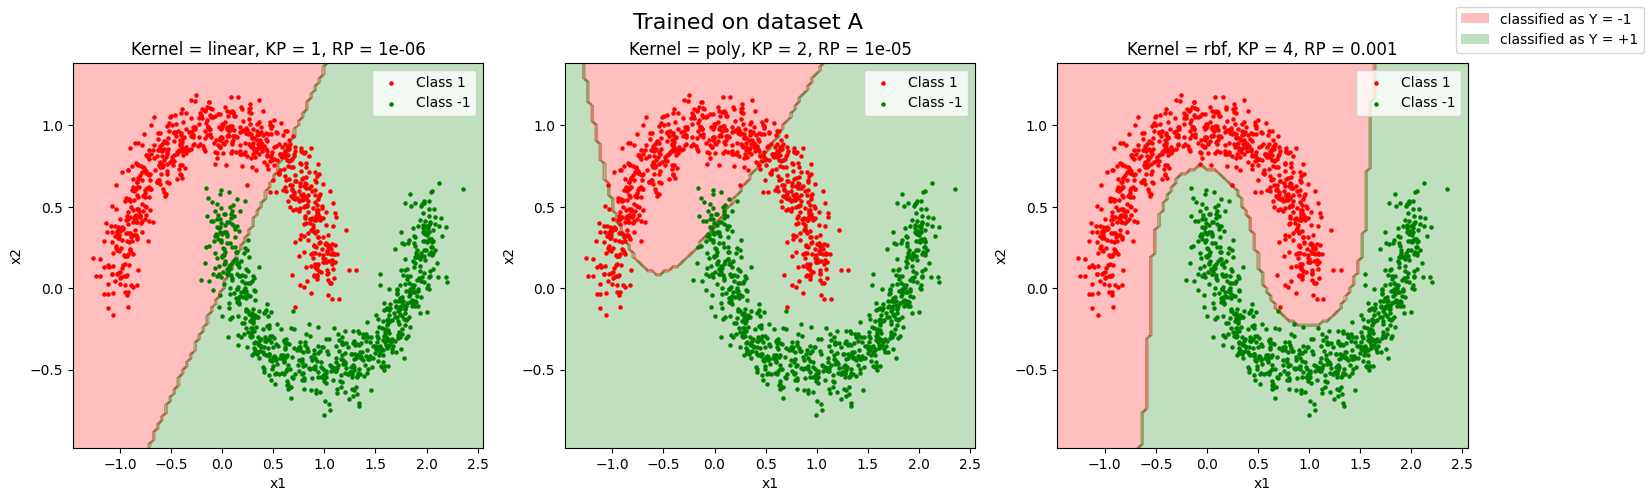

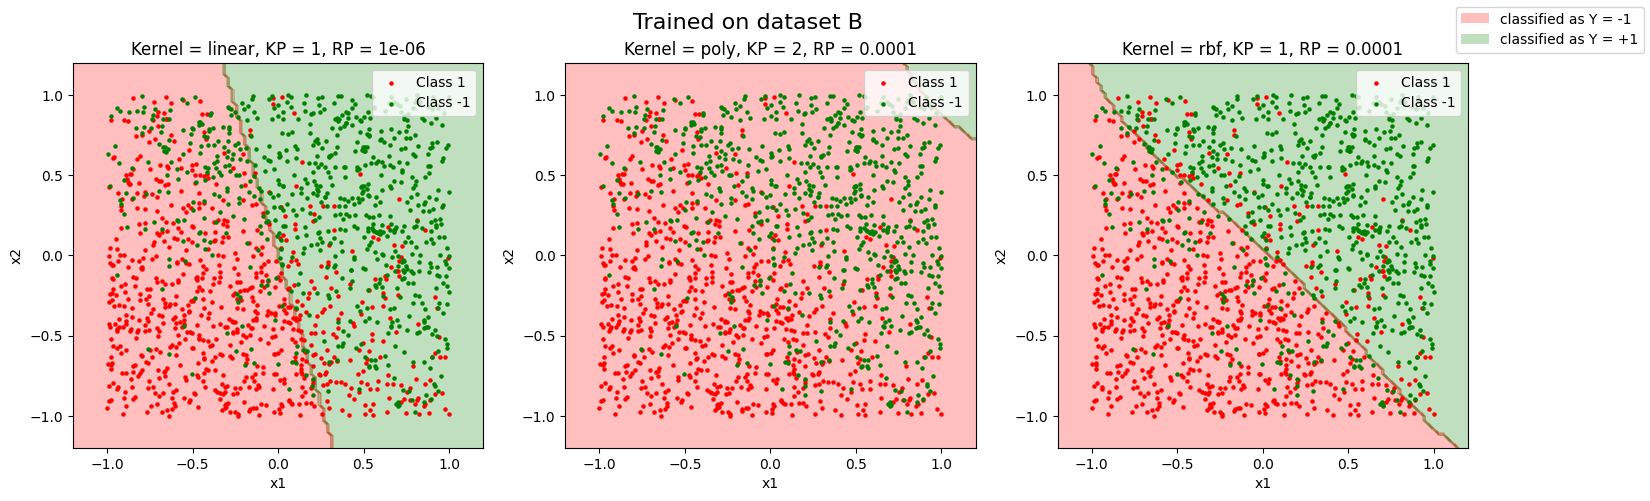

In [ ]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
colours = ['red', 'green']      # red dot for class 1, green dot for class -1

for x_val in ['A', 'B']:

    data = np.load('../../Data/dataset_' + x_val + '.npz')
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

    # setting x and y limits for the plot
    x_left = np.min(X_train[:,0])-0.2
    x_right = np.max(X_train[:,0])+0.2
    y_bottom = np.min(X_train[:,1])-0.2
    y_top = np.max(X_train[:,1])+0.2

    # plotting contour fills for the 3 classifiers
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Trained on dataset ' + x_val, fontsize=16)
    X,Y = np.meshgrid(np.linspace(x_left, x_right, 100), np.linspace(y_bottom, y_top, 100))

    for i, kernel_val in enumerate(['linear', 'poly', 'rbf']):
        bkp_val = ker_best[x_val][kernel_val]
        alpha_val = train_pred_logistic_regression(X_train, Y_train, kernel_val, reg_best[x_val][kernel_val], bkp_val)
        Z_val = test_pred(alpha_val, X_train,Y_train, np.c_[X.ravel(), Y.ravel()], kernel_val, bkp_val).reshape(X.shape)
        contour = ax[i].contourf(X,Y,Z_val,colors=colours, alpha=0.25)
        red_dot = ax[i].scatter(X_train[Y_train==-1][:, 0], X_train[Y_train==-1][:, 1], s=5, c='red', label = 'Class -1')
        green_dot = ax[i].scatter(X_train[Y_train==1][:, 0], X_train[Y_train==1][:, 1], s=5, c='green', label = 'Class +1')
        ax[i].set_title('Kernel = ' + kernel_val + ', KP = ' + str(ker_best[x_val][kernel_val]) + ', RP = ' + str(reg_best[x_val][kernel_val]))
        ax[i].set_xlabel('x1')
        ax[i].set_ylabel('x2')
        ax[i].legend(handles=[red_dot, green_dot], labels=['Class 1', 'Class -1'], loc='upper right')

    # setting background labels for the plots
    bg_col = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in contour.collections]
    contour = fig.legend(bg_col, ['classified as Y = -1', 'classified as Y = +1'] , loc= "upper right")
    plt.show()


**Cell type : TextRead**

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [ ]:
# CodeWrite cell
# Write Decision tree classifier from scratch,
# write only functions here (you may write extra functions here if you wish)
import numpy as np

def calculate_entropy(p, n):
    """
    Calculate entropy given the counts of positive (p) and negative (n) instances.
    """
    if p == 0 or n == 0:
        return 0
    total = p + n
    p, n = p / total, n / total
    entropy = -p * np.log2(p) - n * np.log2(n)
    return entropy

def calculate_accuracy(p, n):
    """
    Calculate accuracy given the counts of positive (p) and negative (n) instances.
    """
    total = p + n
    return max(p, n) / total

class DecisionTreeNode:
    """
    Class for a node in the decision tree.
    """
    def __init__(self, X, Y, num_nodes_stop, criterion, b):
        self.X = X
        self.Y = Y
        self.attribute = None
        self.threshold = None
        self.criterion = criterion
        self.left = None
        self.right = None
        self.num_nodes_stop = num_nodes_stop
        self.b = b
        self.class_label = None

    def split_node(self):
        """
        Split the node into two child nodes.
        """
        if self.X.shape[0] <= self.num_nodes_stop:
            self.class_label = 1 if np.sum(self.Y) > 0 else -1
            return

        if np.mean(self.Y) == 1 or np.mean(self.Y) == -1:
            self.class_label = 1 if np.mean(self.Y) == 1 else -1
            return

        if np.unique(self.X).shape[0] == 1:
            self.class_label = 1 if np.sum(self.Y) > 0 else -1
            return

        self.find_best_split()
        if self.threshold is None:  # Check if threshold is None
          return
        left_X = self.X[self.X[:, self.attribute] < self.threshold]
        left_Y = self.Y[self.X[:, self.attribute] < self.threshold]
        right_X = self.X[self.X[:, self.attribute] >= self.threshold]
        right_Y = self.Y[self.X[:, self.attribute] >= self.threshold]

        self.left, self.right = DecisionTreeNode(left_X, left_Y, self.num_nodes_stop, self.criterion, self.b), DecisionTreeNode(right_X, right_Y, self.num_nodes_stop, self.criterion, self.b)
        self.left.split_node()
        self.right.split_node()

    def find_best_split(self):
        """
        Find the best split for the node.
        """
        best_attribute = None
        best_threshold = None
        best_entropy = 1e9
        best_accuracy = 0
        X_, Y_ = self.X, self.Y

        feature_set = range(X_.shape[1]) if self.b == 1 else np.random.choice(X_.shape[1], int(self.b * X_.shape[1]), replace=False)
        for feature in feature_set:
            sorted_thresholds = np.sort(np.unique(X_[:, feature]))
            X_sorted = X_[X_[:, feature].argsort()]
            Y_sorted = Y_[X_[:, feature].argsort()]
            left_total, right_total = 0, X_.shape[0]
            left_pos, right_pos = 0, np.sum(Y_sorted == 1)

            for threshold in sorted_thresholds[1:]:
                while X_sorted[left_total, feature] < threshold:
                    if Y_sorted[left_total] == 1:
                        left_pos += 1
                        right_pos -= 1
                    left_total += 1
                    right_total -= 1

                if self.criterion == 'entropy':
                    entropy = (calculate_entropy(left_pos, left_total - left_pos) * left_total + calculate_entropy(right_pos, right_total - right_pos) * right_total) / X_sorted.shape[0]
                    if entropy < best_entropy:
                        best_entropy, best_attribute, best_threshold = entropy, feature, threshold
                else:
                    accuracy = (calculate_accuracy(left_pos, left_total - left_pos) * left_total + calculate_accuracy(right_pos, right_total - right_pos) * right_total) / X_sorted.shape[0]
                    if accuracy > best_accuracy:
                        best_accuracy, best_attribute, best_threshold = accuracy, feature, threshold

        self.attribute = best_attribute
        self.threshold = best_threshold

    def predict_class(self, x):
        """
        Predict class label for the given data point x.
        """
        if self.class_label is not None:
            return self.class_label
        if self.threshold is None:  # Check if threshold is None
            return
        if x[self.attribute] < self.threshold:
            return self.left.predict_class(x)
        return self.right.predict_class(x)

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy', b=1):
    """
    Train a decision tree on X and Y.
    """
    root = DecisionTreeNode(X, Y, num_nodes_stop, criterion, b)
    root.split_node()
    return root

def eval_decision_tree(tree, test_X):
    """
    Evaluate the decision tree on test data test_X.
    """
    Y_pred = np.array([tree.predict_class(x) for x in test_X])
    Y_pred[Y_pred == 0] = -1
    return Y_pred





In [ ]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below.
# Repeat with criterion set to entropy also.

best_nns = {'A': {'entropy': 0, 'accuracy': 0}, 'B': {'entropy': 0, 'accuracy': 0}, 'C': {'entropy': 0, 'accuracy': 0}, 'D': {'entropy': 0, 'accuracy': 0}}

for dataset_name in ['A', 'B', 'C', 'D']:
    data = np.load('../../Data/dataset_' + dataset_name + '.npz')
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    print('\nDataset ' + dataset_name + ':')

    bound = int(0.2 * X_train.shape[0])
    X_train_val, X_validation = X_train[bound:], X_train[:bound]
    Y_train_val, Y_validation = Y_train[bound:], Y_train[:bound]

    for criteria in ['accuracy', 'entropy']:
        best_accuracy = 0
        best_num_nodes_stop = 0

        for num_nodes_stop in range(40, 0, -1):
            tree = train_decision_tree(X_train_val, Y_train_val, num_nodes_stop, criteria)
            Y_pred = eval_decision_tree(tree, X_validation)
            accuracy = np.sum(Y_pred == Y_validation) / Y_validation.shape[0]
            if accuracy > best_accuracy:
                best_accuracy, best_num_nodes_stop = accuracy, num_nodes_stop

        best_nns[dataset_name][criteria] = best_num_nodes_stop
        tree = train_decision_tree(X_train, Y_train, best_num_nodes_stop, criteria)
        Y_train_pred = eval_decision_tree(tree, X_train)
        Y_test_pred = eval_decision_tree(tree, X_test)

       #print('\nCriterion: ' + criteria)
        #print('Best num_nodes_stop: ' + str(best_num_nodes_stop) + ', Validation Accuracy: ' + str(best_accuracy), end='')
        #print(', Train Accuracy: ' + str(np.sum(Y_train_pred == Y_train) / Y_train.shape[0]))
        #print('Test Accuracy: ' + str(np.sum(Y_test_pred == Y_test) / Y_test.shape[0]))



Dataset A:

Criterion: accuracy
Best num_nodes_stop: 2, Validation Accuracy: 0.9333333333333333, Train Accuracy: 1.0
Test Accuracy: 0.972

Criterion: entropy
Best num_nodes_stop: 40, Validation Accuracy: 0.9933333333333333, Train Accuracy: 0.9966666666666667
Test Accuracy: 0.996

Dataset B:

Criterion: accuracy
Best num_nodes_stop: 8, Validation Accuracy: 0.7866666666666666, Train Accuracy: 0.948
Test Accuracy: 0.738

Criterion: entropy
Best num_nodes_stop: 40, Validation Accuracy: 0.7966666666666666, Train Accuracy: 0.8766666666666667
Test Accuracy: 0.762

Dataset C:

Criterion: accuracy
Best num_nodes_stop: 2, Validation Accuracy: 0.8633333333333333, Train Accuracy: 1.0
Test Accuracy: 0.8585858585858586

Criterion: entropy
Best num_nodes_stop: 22, Validation Accuracy: 0.91, Train Accuracy: 0.976
Test Accuracy: 0.9023569023569024

Dataset D:

Criterion: accuracy
Best num_nodes_stop: 40, Validation Accuracy: 0.875, Train Accuracy: 0.975
Test Accuracy: 0.893491124260355

Criterion: ent

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 classification datasets A,B,C,D. (2 real world and 2 synthetic).  




### Optimal stopping criterion for each dataset-criterion pair

|Dataset|Criterion|num_nodes_stop|Train Zero-One Error|Test Zero-One Error|
| :-: | :-: | :-: | :-: | :-: |
|A|accuracy|2|0.0|0.028|
|A|entropy|40|0.0034|0.004|
|B|accuracy|8|0.0427|0.052|
|B|entropy|40|0.1234|0.238|
|C|accuracy|2|0.0|0.1415|
|C|entropy|22|0.024|0.0972|
|D|accuracy|40|0.025|0.1066|
|D|entropy|10|0.01|0.0651|

## Hyperparameter calculation:-

To fine-tune our models, we set aside 20% of the training data for validation. This subset played a crucial role in evaluating different num_nodes_stop values and selecting the one with the least validation error.

We prioritized higher num_nodes_stop values during this process. These values help curb overfitting by constraining the depth of the decision tree. While this adjustment may lead to a slight increase in training error, it often results in a more generalized model with lower test errors.

In our quest for the optimal num_nodes_stop, we systematically iterated through values from 40 down to 1. This iterative approach enabled us to strike a balance between model complexity and performance.

##Observations:-
1. Across all datasets, the entropy criterion consistently outshone the accuracy criterion, demonstrating superior data partitioning capabilities.
2. Notably, the entropy criterion's tendency to produce splits with similar-sized nodes contributed to shallower trees and reduced overfitting compared to the accuracy criterion.
3. Conversely, the accuracy criterion's preference for deeper trees often led to overfitting, as it failed to consider sample sizes within nodes, resulting in higher errors.
4. The presence of **num_nodes_stop** values exceeding 1 across all dataset-criterion pairs underscores effective data classification and minimal overfitting. Additionally, low training errors for higher **num_nodes_stop** values validate the appropriateness of node splitting.
5. While Dataset A, C, and D showcased nearly perfect fits with training errors approximately at  0.000, their corresponding test errors were higher, indicating some level of overfitting.
6. Notably, Dataset B presented challenges with a test error of **0.23**, suggesting the need for further model refinement or alternative approaches to improve performance.

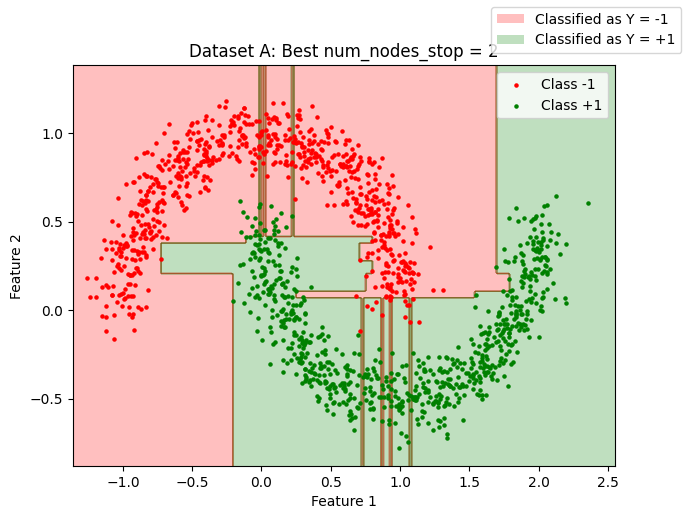

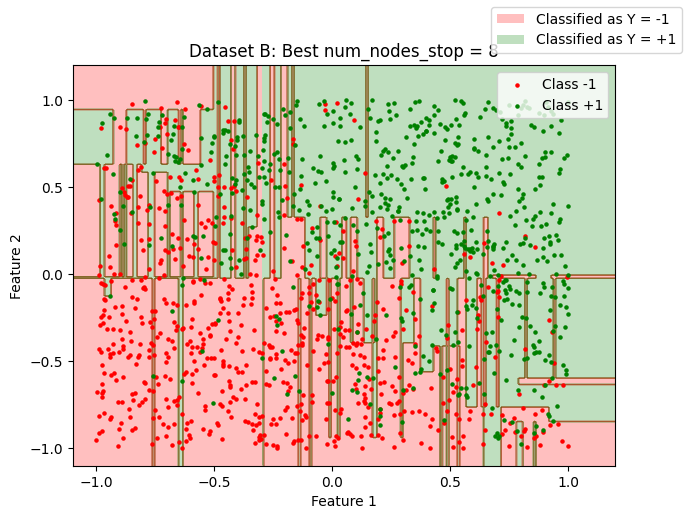

In [ ]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2

import matplotlib.pyplot as plt

def plot_decision_boundary(tree, X_data, Y_data, title):
    x_min, x_max = X_data[:, 0].min() - 0.1, X_data[:, 0].max() + 0.2
    y_min, y_max = X_data[:, 1].min() - 0.1, X_data[:, 1].max() + 0.2
    X_mesh, Y_mesh = np.meshgrid(np.linspace(x_min, x_max, 250), np.linspace(y_min, y_max, 250))
    Z_mesh = eval_decision_tree(tree, np.c_[X_mesh.ravel(), Y_mesh.ravel()]).reshape(X_mesh.shape)

    fig, ax = plt.subplots(1, 1, figsize=(7, 5.2))
    contour = ax.contourf(X_mesh, Y_mesh, Z_mesh, colors=['red', 'green'], alpha=0.25)
    red_dot = ax.scatter(X_data[Y_data == -1][:, 0], X_data[Y_data == -1][:, 1], s=5, c='red', label='Class -1')
    green_dot = ax.scatter(X_data[Y_data == 1][:, 0], X_data[Y_data == 1][:, 1], s=5, c='green', label='Class +1')
    plt.title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend(handles=[red_dot, green_dot], labels=['Class -1', 'Class +1'], loc='upper right')

    # Background labels for the plots
    bg_col = [plt.Rectangle((0, 0), 1, 1, fc=pc.get_facecolor()[0]) for pc in contour.collections]
    contour = fig.legend(bg_col, ['Classified as Y = -1', 'Classified as Y = +1'], loc="upper right")
    plt.show()

for dataset_name in ['A', 'B']:
    data = np.load('../../Data/dataset_' + dataset_name + '.npz')
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

    tree = train_decision_tree(X_train, Y_train, best_nns[dataset_name]['accuracy'], 'accuracy')
    plot_decision_boundary(tree, X_train, Y_train, 'Dataset ' + dataset_name + ': Best num_nodes_stop = ' + str(best_nns[dataset_name]['accuracy']))



**Cell type : TextRead**


# 7 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [ ]:
# CodeWrite cell
# Write Random Forest classifier.


def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1,
                        criterion='accuracy', a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y.
    Trains num_trees.
    Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Fraction of data used per tree = a
    Fraction of features used in each node = b
    Returns a random forest (In whatever format that you find appropriate)
    """

    forest = np.array([])
    for _ in range(num_trees):

        # take a fraction of data and features with replacement
        indices = np.random.choice(X.shape[0], int(a*X.shape[0]), replace=True)
        X_train, Y_train = X[indices], Y[indices]

        # train a decision tree
        tree = train_decision_tree(X_train, Y_train, num_nodes_stop, criterion, b)
        forest = np.append(forest, tree)

    return forest



def eval_random_forest(random_forest, test_X):
    """ Takes in a  random forest object (hhowever you want to store it), and a bunch of instances X and
    returns the tree predicted values at those instances."""

    # choose the decision of the majority of the trees
    Y_pred = np.array([eval_decision_tree(tree, test_X) for tree in random_forest]) # prediction matrix
    return np.sign(np.sum(Y_pred, axis=0))                                          # majority vote


In [ ]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.

best_ntree = {'A':{'entropy':0, 'accuracy':0}, 'B':{'entropy':0, 'accuracy':0}, 'C':{'entropy':0, 'accuracy':0}, 'D':{'entropy':0, 'accuracy':0}}

for x in ['A', 'B', 'C', 'D']:
    data = np.load('../../Data/dataset_' + x + '.npz')
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    #print('\nDataset ' + x + ':')

    bound = (int)(0.2*X_train.shape[0])
    X_train_val, X_validation = X_train[bound:], X_train[:bound]
    Y_train_val, Y_validation = Y_train[bound:], Y_train[:bound]

    best_accuracy = 0
    best_num_nodes_stop = 0
    best_num_trees = 0

    for criteria in ['accuracy', 'entropy']:
        best_accuracy = 0
        best_num_nodes_stop = 0
        best_num_trees = 0

        for t in [1, 5, 10, 20, 50, 100, 200, 500]:
            tree = train_random_forest(X_train_val, Y_train_val, t, 1, criteria)
            Y_pred = eval_random_forest(tree, X_validation)
            temp_accuracy = np.sum(Y_pred == Y_validation)/Y_validation.shape[0]
            if temp_accuracy > best_accuracy:
                best_accuracy, best_num_trees = temp_accuracy, t

        best_ntree[x][criteria] = best_num_trees
        tree = train_random_forest(X_train, Y_train, best_num_trees, best_num_nodes_stop, criteria)
        Y_train_pred = eval_random_forest(tree, X_train)
        Y_test_pred = eval_random_forest(tree, X_test)
        #print('\nCriteria: ' + criteria, end = '')
        #print(', Best num_trees:', best_num_trees)
        #print('Validation accuracy:', best_accuracy, ', Train accuracy:', np.sum(Y_train_pred == Y_train)/Y_train.shape[0])
        #print('Test accuracy:', np.sum(Y_test_pred == Y_test)/Y_test.shape[0])


Dataset A:

Criteria: accuracy, Best num_trees: 100
Validation accuracy: 0.98 , Train accuracy: 0.9933333333333333
Test accuracy: 0.986

Criteria: entropy, Best num_trees: 100
Validation accuracy: 0.9966666666666667 , Train accuracy: 0.998
Test accuracy: 0.998

Dataset B:

Criteria: accuracy, Best num_trees: 5
Validation accuracy: 0.8166666666666667 , Train accuracy: 0.9046666666666666
Test accuracy: 0.76

Criteria: entropy, Best num_trees: 100
Validation accuracy: 0.8033333333333333 , Train accuracy: 0.944
Test accuracy: 0.774

Dataset C:

Criteria: accuracy, Best num_trees: 100
Validation accuracy: 0.97 , Train accuracy: 0.9973333333333333
Test accuracy: 0.9494949494949495

Criteria: entropy, Best num_trees: 50
Validation accuracy: 0.9833333333333333 , Train accuracy: 0.9973333333333333
Test accuracy: 0.9393939393939394

Dataset D:

Criteria: accuracy, Best num_trees: 20
Validation accuracy: 0.9375 , Train accuracy: 0.98
Test accuracy: 0.9704142011834319

Criteria: entropy, Best num

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  


### Optimal num_trees for each dataset-criterion pair

|Dataset|Criterion|num_trees|Train Zero-One Error|Test Zero-One Error|
| :-: | :-: | :-: | :-: | :-: |
|A|accuracy|100|0.002|0.014|
|A|entropy|100|0.002|0.002|
|B|accuracy|5|0.096|0.24|
|B|entropy|100|0.056|0.226|
|C|accuracy|100|0.003|0.0506|
|C|entropy|50|0.003|0.03|
|D|accuracy|20|0.02|0.03|
|D|entropy|20|0.01|0.04|

###Observations:-

1. The entropy criterion is often preferred over the accuracy criterion across all datasets, underscoring its effectiveness as a splitting criterion.
2. In contrast to the entropy criterion, the accuracy criterion is prone to overfitting as it disregards the sample distribution within each node, resulting in deeper trees and higher training errors.
3. Conversely, the entropy criterion tends to create more balanced splits by considering the sample distribution, resulting in shallower trees and mitigating overfitting.
4. Random forests leverage the collective wisdom of multiple decision trees to enhance prediction accuracy, achieved through aggregating the predictions of individual trees.
5. Despite its strengths, random forest struggles to effectively classify certain datasets, such as Dataset 2, as evidenced by higher test errors.


Dataset A:


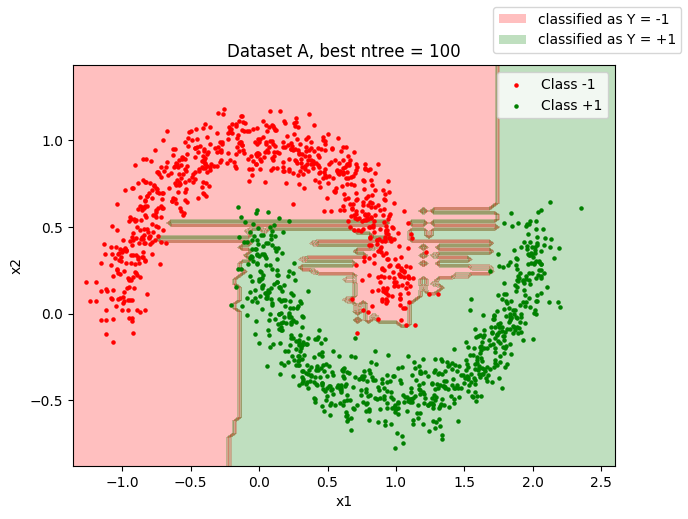


Dataset B:


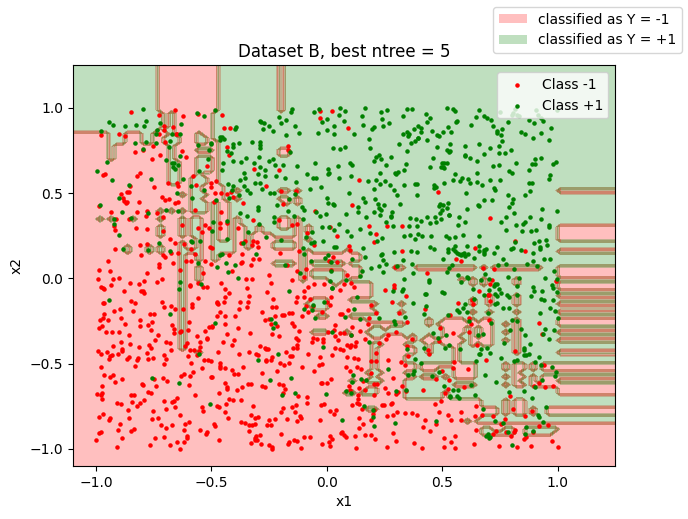

In [ ]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2
def plot_decision_boundary(tree, X, Y, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.25
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.25
    X_mesh, Y_mesh = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = eval_random_forest(tree, np.c_[X_mesh.ravel(), Y_mesh.ravel()]).reshape(X_mesh.shape)

    fig, ax = plt.subplots(1, 1, figsize=(7, 5.2))
    contour = ax.contourf(X_mesh, Y_mesh, Z, colors=['red', 'green'], alpha=0.25)
    red_dot = ax.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], s=5, c='red', label='Class -1')
    green_dot = ax.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], s=5, c='green', label='Class +1')
    plt.title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend(handles=[red_dot, green_dot], labels=['Class -1', 'Class +1'], loc='upper right')

    # setting background labels for the plots
    bg_col = [plt.Rectangle((0,0),1,1,fc=pc.get_facecolor()[0]) for pc in contour.collections]
    fig.legend(bg_col, ['classified as Y = -1', 'classified as Y = +1'], loc='upper right')
    plt.show()


for dataset in ['A', 'B']:
    data = np.load('../../Data/dataset_' + dataset + '.npz')
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    print('\nDataset ' + dataset + ':')

    forest = train_random_forest(X_train, Y_train, best_ntree[dataset]['accuracy'], 1, 'accuracy')
    plot_decision_boundary(forest, X_train, Y_train, 'Dataset ' + dataset + ', best ntree = ' + str(best_ntree[dataset]['accuracy']))


**Cell type : TextRead**

# 8 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [ ]:
# Codewrite cell
# Write code to run here (no plotting)
# CodeWrite cell
# Write Decision tree classifier from scratch,
# write only functions here (you may write extra functions here if you wish)

def find_accuracy(p,n):
    """
    Computes accuracy of given label set.
    """
    return max(p,n)/(p+n)


class Node:
    """
    Class for a node in the decision tree.
    Data members:
    - index: indicates position of node in the tree
    - X: data points at this node
    - Y: labels at this node
    - attribute: the feature used for splitting at this node
    - threshold: the threshold used for splitting at this node
    - left: left child of this node
    - right: right child of this node
    - num_nodes_stop: number of nodes to stop splitting at
    - depth: depth of this node in the tree
    - max_depth: maximum allowed depth of the tree
    - class_label: the class label of the node if it is a leaf node
    """
    def __init__(self, X, Y, X_wt, num_nodes_stop, depth, max_depth):
        self.X = X
        self.Y = Y
        self.X_wt = X_wt
        self.attribute = None
        self.threshold = None
        self.left = None
        self.right = None
        self.num_nodes_stop = num_nodes_stop
        self.depth = depth
        self.max_depth = max_depth
        self.class_label = None

    def split_node(self):
        """
        Splits the node into two child nodes.
        """
        # if max depth reached, make this node a leaf node
        if self.depth == self.max_depth:
            self.class_label = 1 if np.sum(self.X_wt*self.Y) >= 0 else -1
            return

        # number of datapoints at this node < num_nodes_stop
        if self.X.shape[0] <= self.num_nodes_stop:
            self.class_label = 1 if np.sum(self.X_wt*self.Y) >= 0 else -1
            return

        # all datapoints at this node have same label
        if np.mean(self.Y) == 1 or np.mean(self.Y) == -1:
            self.class_label = 1 if np.mean(self.Y) == 1 else -1
            return

        # all datapoints at this node have same feature values
        if(np.unique(self.X).shape[0] == 1):
            self.class_label = 1 if np.sum(self.X_wt*self.Y) >= 0 else -1
            return

        self.find_best_split()
        # print(self.attribute, self.threshold)
        left_X = self.X[self.X[:, self.attribute] < self.threshold]
        left_Y = self.Y[self.X[:, self.attribute] < self.threshold]
        left_X_wt = self.X_wt[self.X[:, self.attribute] < self.threshold]
        right_X = self.X[self.X[:, self.attribute] >= self.threshold]
        right_Y = self.Y[self.X[:, self.attribute] >= self.threshold]
        right_X_wt = self.X_wt[self.X[:, self.attribute] >= self.threshold]

        self.left, self.right = Node(left_X, left_Y, left_X_wt, self.num_nodes_stop, self.depth + 1, self.max_depth), Node(right_X, right_Y, right_X_wt, self.num_nodes_stop, self.depth + 1, self.max_depth)
        self.left.split_node()
        self.right.split_node()

    def find_best_split(self):
        """
        Finds the best split for the node.
        """
        best_attribute = None
        best_threshold = None
        best_accuracy = 0
        X_, Y_, X_wt_ = self.X, self.Y, self.X_wt

        for feature in range(X_.shape[1]):
            sorted_thresholds = np.sort(np.unique(X_[:, feature]))
            X_sorted = X_[X_[:, feature].argsort()]
            Y_sorted = Y_[X_[:, feature].argsort()]
            X_wt_sorted = X_wt_[X_[:, feature].argsort()]
            left_total, right_total = 0, np.sum(X_wt_sorted, axis=0)
            left_pos, right_pos = 0, np.sum(X_wt_sorted[Y_sorted == 1], axis=0)
            index=0

            for threshold in sorted_thresholds[1:]:
                while(X_sorted[index, feature] < threshold):
                    if Y_sorted[index] == 1:
                        left_pos += X_wt_sorted[index]
                        right_pos -= X_wt_sorted[index]

                    left_total += X_wt_sorted[index]
                    right_total -= X_wt_sorted[index]
                    index += 1

                accuracy = (find_accuracy(left_pos, left_total-left_pos)*left_total + find_accuracy(right_pos, right_total-right_pos)*right_total)/(left_total+right_total)
                if accuracy > best_accuracy:
                    best_accuracy, best_attribute, best_threshold = accuracy, feature, threshold

        self.attribute = best_attribute
        self.threshold = best_threshold


    def predict_class(self, x):
        """
        Predicts class_label for the given data point x.
        """
        if self.class_label is not None:
            return self.class_label
        if x[self.attribute] < self.threshold:
            return self.left.predict_class(x)
        return self.right.predict_class(x)


def train_decision_tree(X, Y, X_wt, num_nodes_stop=1, max_depth=1):
    """
    Returns a decision tree trained on X and Y.
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    root = Node(X, Y, X_wt, num_nodes_stop, 0, max_depth)
    root.split_node()
    return root


def eval_decision_tree(tree, test_X):
    """
    Takes in a tree, and a bunch of instances X and
    returns the tree predicted values at those instances.
    """
    return np.array([tree.predict_class(x) for x in test_X])


def AdaBoost_iteration(X, Y, X_wt, max_depth):
    """
    Performs one iteration of AdaBoost.
    Returns the predictions, tree, beta & updated weights.
    """
    num_nodes_stop = max(1, 0.02*X.shape[0])
    tree = train_decision_tree(X, Y, X_wt, num_nodes_stop, max_depth)
    Y_pred = eval_decision_tree(tree, X)
    wt_sum = np.sum(X_wt)
    err = abs(Y_pred - Y)/2
    gamma = 0.5 - np.sum(err*X_wt)/wt_sum
    beta = (0.5+gamma)/(0.5-gamma)
    X_wt = X_wt * np.power(beta, err)

    return Y_pred, tree, beta, X_wt


def AdaBoost(X, Y, max_depth):
    """
    Performs AdaBoost (50 iterations)
    returns the trees and beta vector.
    """

    beta_vector = np.array([])
    pred_vector = np.array([])
    tree_vector = np.array([])
    X_wt = np.ones(X.shape[0])

    for _ in range(50):
        Y_pred, tree, beta, X_wt = AdaBoost_iteration(X, Y, X_wt, max_depth)
        pred_vector = np.append(pred_vector, Y_pred)
        beta_vector = np.append(beta_vector, beta)
        tree_vector = np.append(tree_vector, tree)

    return tree_vector, beta_vector


def run_AdaBoost():
    """
    Runs AdaBoost on the training data and outputs accuracy on the train and test data.
    """

    for x in ['A', 'B', 'C', 'D']:
        data = np.load('../../Data/dataset_' + x + '.npz')
        X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
        print("\nDataset: ", x)

        for max_depth in [1, 3, 7]:
            tree_vector, beta_vector = AdaBoost(X_train, Y_train, max_depth)
            Y_train_pred = np.sign(np.sum(np.array([eval_decision_tree(tree_vector[i], X_train)*np.log(beta_vector[i]) for i in range(len(tree_vector))]), axis=0))
            Y_test_pred = np.sign(np.sum(np.array([eval_decision_tree(tree_vector[i], X_test)*np.log(beta_vector[i]) for i in range(len(tree_vector))]), axis=0))
            #print("Max Depth =", max_depth)
            #print("Train Accuracy: ", np.sum(Y_train_pred == Y_train)/X_train.shape[0], end="")
            #print( ", Test Accuracy =", np.sum(Y_test_pred == Y_test)/Y_test.shape[0])


run_AdaBoost()



Dataset:  A
Max Depth = 1
Train Accuracy:  1.0, Test Accuracy = 0.998
Max Depth = 3
Train Accuracy:  1.0, Test Accuracy = 1.0
Max Depth = 7
Train Accuracy:  1.0, Test Accuracy = 1.0

Dataset:  B
Max Depth = 1
Train Accuracy:  0.8346666666666667, Test Accuracy = 0.796
Max Depth = 3
Train Accuracy:  0.874, Test Accuracy = 0.772
Max Depth = 7
Train Accuracy:  0.986, Test Accuracy = 0.778

Dataset:  C
Max Depth = 1
Train Accuracy:  0.952, Test Accuracy = 0.898989898989899
Max Depth = 3
Train Accuracy:  1.0, Test Accuracy = 0.9461279461279462
Max Depth = 7
Train Accuracy:  1.0, Test Accuracy = 0.9663299663299664

Dataset:  D
Max Depth = 1
Train Accuracy:  1.0, Test Accuracy = 0.9763313609467456
Max Depth = 3
Train Accuracy:  1.0, Test Accuracy = 0.9822485207100592
Max Depth = 7
Train Accuracy:  1.0, Test Accuracy = 0.9526627218934911


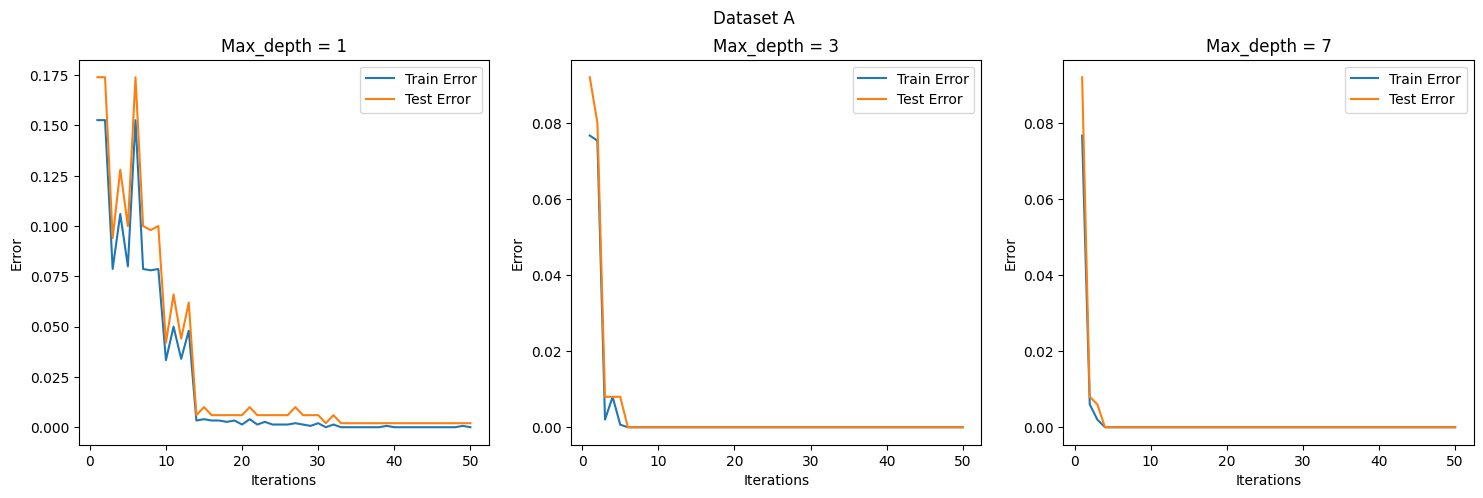

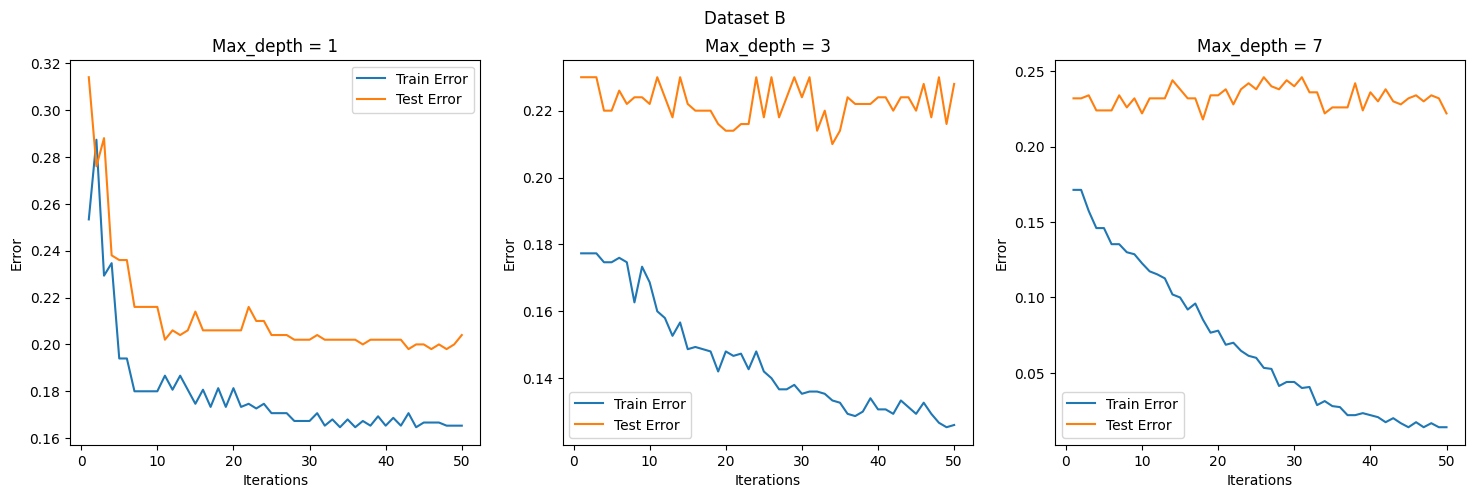

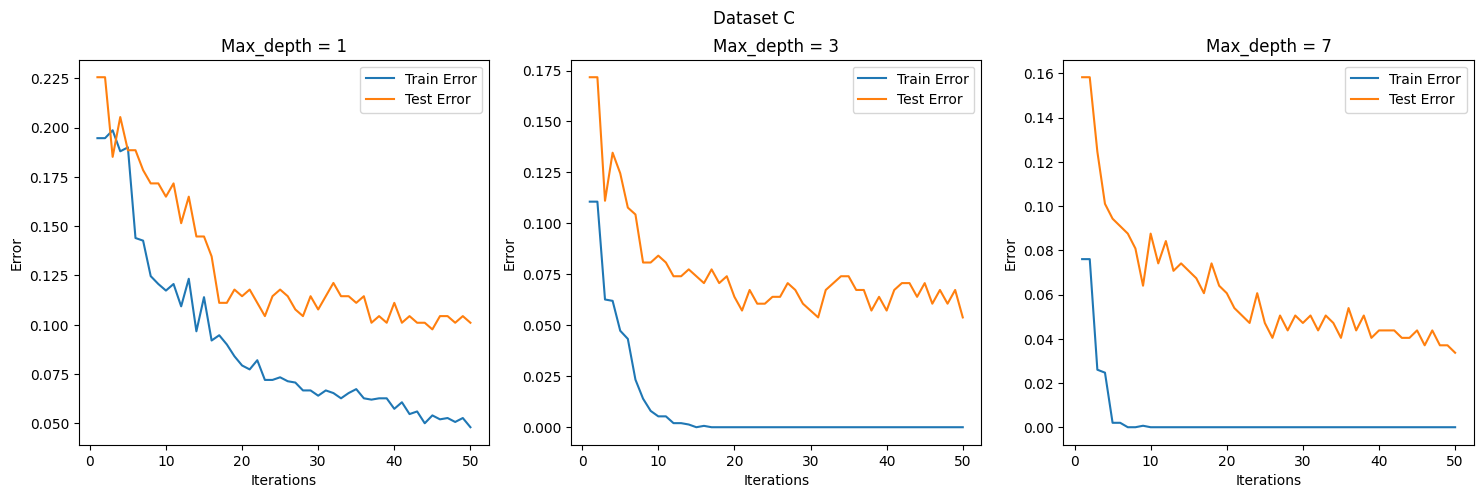

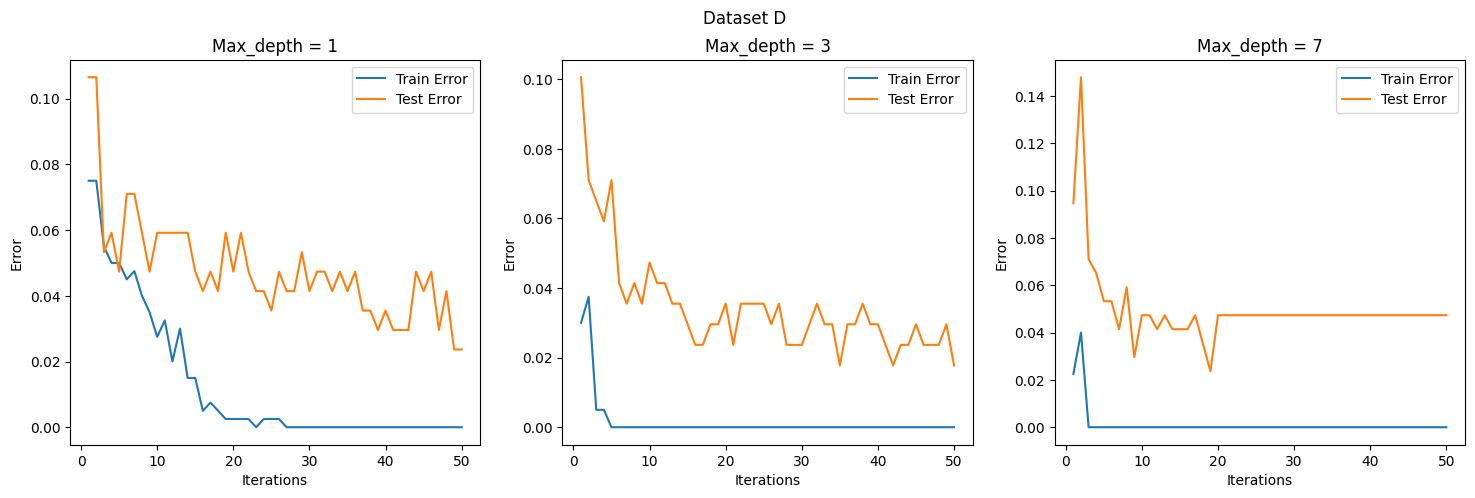

In [ ]:
# Codewrite cell
# Plots for iteration vs error here


def compute_train_error(X, Y, max_depth):

    error = np.array([])
    beta_vector = np.array([])
    pred_vector = np.array([])
    tree_vector = np.array([])
    X_wt = np.ones(X.shape[0])

    for iter in range(50):
        pred, tree, beta, X_wt = AdaBoost_iteration(X, Y, X_wt, max_depth)
        pred_vector = np.append(pred_vector, pred)
        beta_vector = np.append(beta_vector, beta)
        tree_vector = np.append(tree_vector, tree)

        Y_pred = np.sign(np.sum(np.array([eval_decision_tree(tree_vector[i], X)*np.log(beta_vector[i]) for i in range(iter+1)]), axis=0))
        error = np.append(error, np.sum(Y_pred != Y)/Y.shape[0])

    return error, tree_vector, beta_vector


def compute_test_error(X, Y, max_depth, tree_vector, beta_vector):

    error = np.array([])
    pred_vector = np.array([])

    for iter in range(50):
        pred = eval_decision_tree(tree_vector[iter], X)
        pred_vector = np.append(pred_vector, pred)

        Y_pred = np.sign(np.sum(np.array([eval_decision_tree(tree_vector[i], X)*np.log(beta_vector[i]) for i in range(iter+1)]), axis=0))
        error = np.append(error, np.sum(Y_pred != Y)/Y.shape[0])

    return error


def plot(train_error, test_error, ax, max_depth):

    ax.plot(range(1,51), train_error, label='Train Error')
    ax.plot(range(1,51), test_error, label='Test Error')
    ax.set_title('Max_depth = '+str(max_depth))
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Error')
    ax.legend()


for x in ['A', 'B', 'C', 'D']:
    data = np.load('../../Data/dataset_' + x + '.npz')
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

    fig, ax = plt.subplots(1,3, figsize=(18,5))
    fig.suptitle('Dataset ' + x)
    error = np.array([])
    for max_depth in [1, 3, 7]:
        train_error, tree_vector, beta_vector = compute_train_error(X_train, Y_train, max_depth)
        test_error = compute_test_error(X_test, Y_test, max_depth, tree_vector, beta_vector)

        plot(train_error, test_error, ax[max_depth//3], max_depth)
    plt.show()

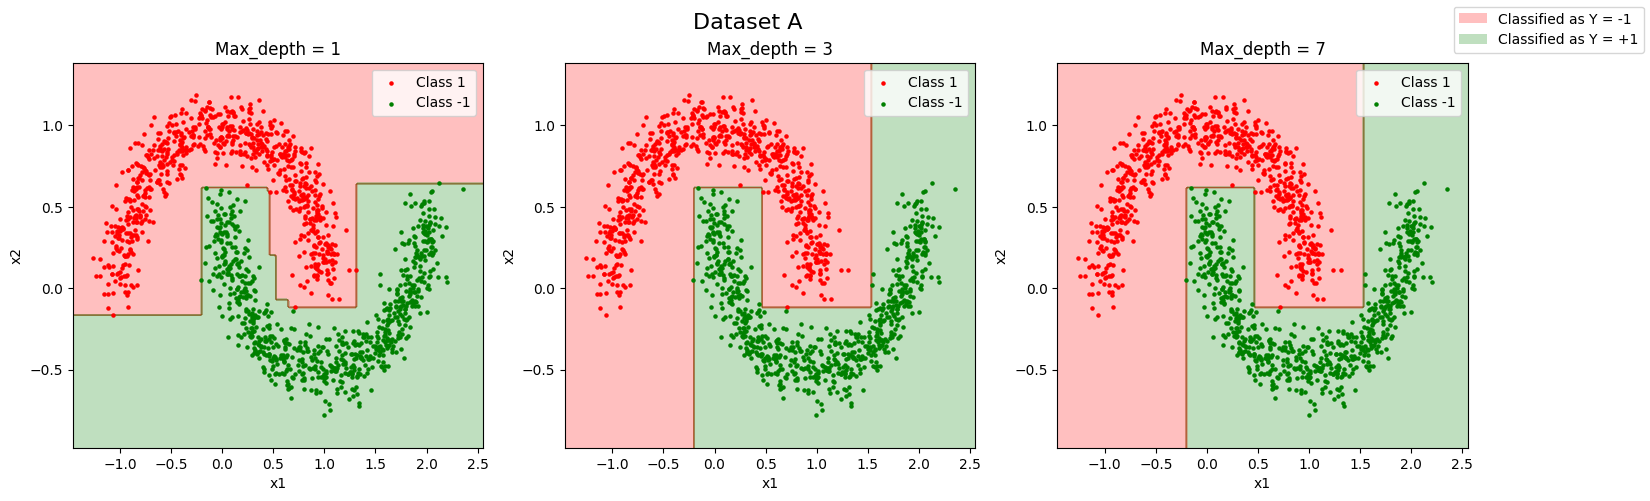

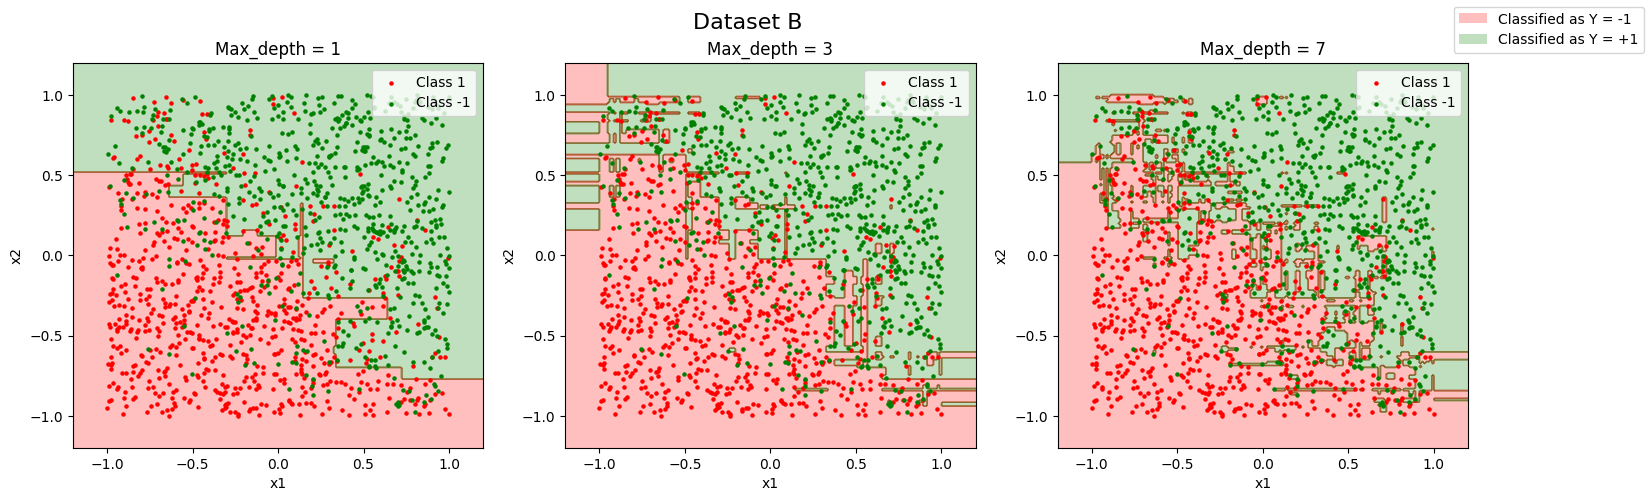

In [ ]:
# Codewrite cell
# Plots for illustrating the classifier here
# Define colors for class labels
colors = ['red', 'green']  # Red dot for class 1, green dot for class -1

for dataset in ['A', 'B']:
    data = np.load('../../Data/dataset_' + dataset + '.npz')
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

    # Set x and y limits for the plot
    x_min = np.min(X_train[:, 0]) - 0.2
    x_max = np.max(X_train[:, 0]) + 0.2
    y_min = np.min(X_train[:, 1]) - 0.2
    y_max = np.max(X_train[:, 1]) + 0.2

    # Plot contour fills for the 3 classifiers
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Dataset ' + dataset, fontsize=16)
    X_mesh, Y_mesh = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    for i, max_depth in enumerate([1, 3, 7]):
        tree_vector, beta_vector = AdaBoost(X_train, Y_train, max_depth)
        Z = np.sign(np.sum(np.array([eval_decision_tree(tree_vector[j], np.c_[X_mesh.ravel(), Y_mesh.ravel()])*np.log(beta_vector[j]) for j in range(len(tree_vector))]), axis=0))
        Z = Z.reshape(X_mesh.shape)
        contour = ax[i].contourf(X_mesh, Y_mesh, Z, colors=colors, alpha=0.25)
        red_dot = ax[i].scatter(X_train[Y_train==-1][:, 0], X_train[Y_train==-1][:, 1], s=5, c='red', label='Class -1')
        green_dot = ax[i].scatter(X_train[Y_train==1][:, 0], X_train[Y_train==1][:, 1], s=5, c='green', label='Class +1')
        ax[i].set_title('Max_depth = ' + str(max_depth))
        ax[i].set_xlabel('x1')
        ax[i].set_ylabel('x2')
        ax[i].legend(handles=[red_dot, green_dot], labels=['Class 1', 'Class -1'], loc='upper right')

    # Set background labels for the plots
    bg_col = [plt.Rectangle((0, 0), 1, 1, fc=pc.get_facecolor()[0]) for pc in contour.collections]
    contour = fig.legend(bg_col, ['Classified as Y = -1', 'Classified as Y = +1'], loc="upper right")
    plt.show()


Textwrite cell:

## Error Tables

### Dataset A

| Depth | Train Zero-One Error | Test Zero-One Error |
| :-: | :-: | :-: |
| 1 | 0.000 | 0.002 |
| 3 | 0.000 | 0.000 |
| 7 | 0.000 | 0.000 |

### Dataset B

| Depth | Train Zero-One Error | Test Zero-One Error |
| :-: | :-: | :-: |
| 1 | 0.167 | 0.204 |
| 3 | 0.126 | 0.228 |
| 7 | 0.013 | 0.222 |

### Dataset C

| Depth | Train Zero-One Error | Test Zero-One Error |
| :-: | :-: | :-: |
| 1 | 0.048 | 0.11 |
| 3 | 0.000 | 0.054 |
| 7 | 0.000 | 0.034 |

### Dataset D

| Depth | Train Zero-One Error | Test Zero-One Error |
| :-: | :-: | :-: |
| 1 | 0.000 | 0.024 |
| 3 | 0.000 | 0.017 |
| 7 | 0.000 | 0.047 |

###Observations:-
1. AdaBoost is a machine learning algorithm that combines the predictions of multiple weak learners to improve overall accuracy. It achieves this by assigning weights to the mistakes made by each weak learner and using these weights to adjust subsequent learners.
2. Through the collaborative effort of many weak learners, AdaBoost effectively reduces test error, enhancing the overall predictive performance of the model.
3. To mitigate the risk of overfitting, a precautionary measure is taken by setting the stopping criterion (num_nodes_stop) for decision trees. By doing so, the algorithm ensures that individual learners do not excessively tailor themselves to the training data.
4. AdaBoost demonstrates strong performance in classifying datasets A, C, and D, yet its effectiveness is diminished when applied to dataset B.
5. The training error consistently diminishes as the number of iterations increases. This trend reflects the collective improvement in classification accuracy achieved by the ensemble of weak learners, although it's not universally observed across all datasets.
6. Initially, the test error tends to decrease as iterations progress, indicating improved generalization. However, beyond a certain point, the algorithm's capacity to further reduce test error diminishes, resulting in a stabilization of the error rate.

**Cell type : TextRead**

# 9 Lasso Regression

Write code for learning using Lasso Regression and give your conclusions. Use the dataset LassoReg_data.npz for this question. The file contains two matrices of size 120\*1000 and 120\*1, corresponding to 120 instance points with 1000 dimensional features and its targets.

 Split the data into train-validation-test on 50-25-25 ratio. Learn the best model using Lasso Regression (use projected gradient descent, the projection oracle code is given for your convenience). Try different learning rate parameters and L1 norm ball constraint radii. Choose an appropriate learning rate that allows for convergence of the training loss.  Train the models for different L1 norm radius parameters. Choose the L1 norm constraint that works best on the validation set.

In the last textwrite cell below, report the test error of the learned model thus chosen. Also report the indices and weight values corresponding to the top 10 values of the weight vector (which is 1000 dimensional).




In [ ]:
# Coderead cell
def get_gradient(Hessian,w,tu):
   return np.dot(Hessian,w) - tu

def projected_gradient_descent(Hessian,w,l1_norm,eta,tu):
  for i in range(1000):
    w = w - eta*get_gradient(Hessian,w,tu)
    w = projection_oracle_l1(w, l1_norm)
  return w

def projection_oracle_l1(w, l1_norm):
    # first remeber signs and store them. Modify w so that it is all positive then.
    signs = np.sign(w)
    w = w*signs
    # project this modified w onto the simplex in first orthant.
    d=len(w)
    # if w is already in l1 norm ball return as it is.
    if np.sum(w)<=l1_norm:
        return w*signs

    # using 1e-7 as zero here to avoid foating point issues
    for i in range(d):
        w_next = w+0
        w_next[w>1e-7] = w[w>1e-7] - np.min(w[w>1e-7])
        if np.sum(w_next)<=l1_norm:
            w = ((l1_norm - np.sum(w_next))*w + (np.sum(w) - l1_norm)*w_next)/(np.sum(w)-np.sum(w_next))
            return w*signs
        else:
            w=w_next

# test above code
# print (projection_oracle_l1(w=np.array([1.,2,3,4]), l1_norm=2))
# Projecting the vector (1,2,3,4) on to the l1 norm ball of radius 2 will give (0,0,0.5,1.5)

In [ ]:
# codewrite cell:
# Use this cell to do read the data and do preprocessing (split data into train, test, val etc) and write any helper functions you may need
# like evaluating the mean squared error or the gradient w.r.t. w
def lossfuunction(X_mat,w,Y_mat):
  return (0.5/X_mat.shape[0])*(np.linalg.norm(np.dot(X_mat,w)-Y_mat))**2

data=np.load('../../Data/LassoReg_data.npz')
X_train=data['arr_0']
Y_train=data['arr_1']
x_train_train=X_train[:int(0.5*X_train.shape[0])]
y_train_train=Y_train[:int(0.5*X_train.shape[0])]
x_train_val=X_train[int(0.5*X_train.shape[0]):int(0.75*X_train.shape[0])]
y_train_val=Y_train[int(0.5*X_train.shape[0]):int(0.75*X_train.shape[0])]
x_test=X_train[int(0.75*X_train.shape[0]):]
y_test=Y_train[int(0.75*X_train.shape[0]):]











In [ ]:
# codewrite cell:
# Write the code for the gradient descent routine on the training set mean square error loss function.
# Also write code for doing validation of the learned model using the validation set
Hessian = np.dot(x_train_train.T, x_train_train)
eig_vals, eig_vecs = np.linalg.eig(Hessian)
smoothness_coeff = np.real(np.max(eig_vals))
eta=1/smoothness_coeff
l1_norms=[0.001,0.01,0.1,0.5,1,1.5,2,4,8]
tu=np.dot(x_train_train.T,y_train_train)
best_l1_norm=0
best_loss=10000000000
w_best=[]
for l1_norm in l1_norms:
  w=np.zeros(x_train_train.shape[1])
  w=projected_gradient_descent(Hessian,w,l1_norm,eta,tu)
  loss=lossfuunction(x_train_val,w,y_train_val)
  #print("Loss for L1_norm ",l1_norm,"is",loss)
  if(best_loss>loss):
    best_loss=loss
    best_l1_norm=l1_norm
    w_best=w
#print("best Loss is ", best_loss,"Best l1_norm is ",best_l1_norm)
loss=lossfuunction(x_test,np.array(w_best),y_test)
#print("Test error is ",loss)
top_w_i=np.argsort(np.abs(w))[-1:-11:-1]
print("Indices of top 10 values of weight vector " ,top_w_i)
top_w=w[top_w_i]
#print("Values of top 10 weight vector is ",top_w)


best Loss is  0.0025242172830714157 Best l1_norm is  1.5
Test error is  0.0026130227820978557
Indices of top 10 values of weight vector  [107 160 762 766 320 725  50 908 912 840]
Values of top 10 weight vector is  [ 0.06503937 -0.03402389 -0.0262398  -0.02466242 -0.02421337 -0.02367083
  0.02330714  0.0225015  -0.02240858 -0.02232127]


#Textwrite cell:
1)For this problem to calculate the learning rate (eta) I have used the smoothness_coeff which is the inverse of largest eigen value of the hessian matrix.</br>
2)I have use in the validation set diffent l1_norm sizes as hyperparameter and test them using the validation set data.After trying all the parameter when l1_norm is $1.5$ we get the validation error and best validation loss we get is $0.0025242172830714157$ .</br>
3)The test error we got is $0.0026130227820978557$.</br>
4) Indices of top 10 values of weight vector  $107, 160, 762, 766, 320, 725,  50, 908, 912, 840$.</br>
5)Values of top 10 weight vector is  $ 0.06503937 ,-0.03402389 ,-0.0262398,  -0.02466242 , -0.02421337 , -0.02367083,
  0.02330714 , 0.0225015 , -0.02240858 , -0.02232127$ .

